# Problem Statement #

# Solution || Approch #

## Libraries Import ##

In [1557]:
import pandas as pd
import os
import glob 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
import datetime
import decimal
from mpl_toolkits.mplot3d import Axes3D

## Display Setting ##

In [1558]:
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('max_colwidth',999)
pd.set_option('display.max_columns', 999)
pd.set_option("display.max_rows",999)
pd.set_option('display.float_format', lambda x: '%.8f' % x)

## Load Data ##

Loading data in .xlsx format as is from the input.

In [1559]:
data = pd.read_excel('C:/Users/suryadeept/Downloads/Data_for_ML_Problem-QH/Data_Science_Problem-external.xlsx',sheet_name='Data')

Loading the metadata infromation

In [1560]:
metadata = pd.read_excel('C:/Users/suryadeept/Downloads/Data_for_ML_Problem-QH/Data_Science_Problem-external.xlsx',sheet_name='field-info')

In [1561]:
print(data.shape)
print(metadata.shape)

(8001, 39)
(34, 4)


hypothesis was that columns in data should match rows in metadata. however, there seems be 5 extra columns in the data

In [1562]:
metadata

,Field Name,Description,Type,Can be empty?
0,dir,"Direction of the connection establishment (in, out)",char string,Y
1,local_ip,local ip address of the endpoint,IP v4,N
2,lp,local port of the endpoint,number,N
3,mod,"Mode of signature, it can either be blocking (blk) or monitoring (mon)",char string,N
4,nm,Name of the signature,alpha-numeric,N
5,prod,Application name which was initiating the connection,char string,Y
6,productId,Unique ID for product,alpha-numeric,Y
7,protocol,Communication protocol,char string,N
8,ref,Reference about signature,char string,Y
9,remote_ip,Remote ip address wherein connection was established,IP v4,N


In [1563]:
data.head()

,dir,local_ip,lp,mod,nm,prod,productId,protocol,ref,remote_ip,rp,sigid,sigwid,timestamp,ua,url,company_name,cust_id,last_vdb_timestamp,machine_type,os_arch,os_id,os_name,pkhash,product_name,product_version,sp_major_version,sp_minor_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,in,124.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,NaN,qhpdt4,NaN,NaN,90.811.108.100,62390,NaN,qhcltr-1,2019-03-01T14:34:51.000Z,NaN,NaN,qhcomp1,4e4789c041c1d9517f0b5648b3366a,"28 February, 2019 (10:52:05)",DESKTOP,64Bit,50040,Windows Server 2012 R2 64 bit,7fb5ef7c0113bd557ada5c0445ec91,qhpname3,qhpver0,0,0,0,"01 March, 2019 (08:08:51)",government,city141,country4,region31,NaN,nan,NaN,NaN,NaN
1,in,83.131.177.201,734034,blk,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,NaN,19.131.177.921.,49915,31780,qhcltr4,2019-03-01T14:34:51.000Z,NaN,NaN,qhcomp1,7a30bd86e7d0a29a98244774cb2d2b7a,"28 February, 2019 (10:52:05)",DESKTOP,32Bit,50016,Windows XP Professional,5194279487c0779a605e969aa950d338,qhpname6,qhpver0,3,0,0,"01 March, 2019 (08:08:31)",it,city170,country4,region40,NaN,nan,NaN,NaN,NaN
2,in,124.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,NaN,qhpdt4,NaN,NaN,90.811.108.100,62390,NaN,qhcltr-1,2019-03-01T14:34:51.000Z,NaN,NaN,qhcomp1,4e4789c041c1d9517f0b5648b3366a,"28 February, 2019 (10:52:05)",DESKTOP,64Bit,50040,Windows Server 2012 R2 64 bit,7fb5ef7c0113bd557ada5c0445ec91,qhpname3,qhpver0,0,0,0,"01 March, 2019 (08:08:51)",finance,city141,country4,region31,NaN,nan,NaN,NaN,NaN
3,in,83.131.177.277,734034,abc,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,NaN,19.131.177.921.,49915,31780,qhcltr4,2019-03-01T14:34:51.000Z,NaN,NaN,qhcomp1,7a30bd86e7d0a29a98244774cb2d2b7a,"28 February, 2019 (10:52:05)",DESKTOP,32Bit,50016,Windows XP Professional,5194279487c0779a605e969aa950d338,qhpname6,qhpver0,3,0,0,"01 March, 2019 (08:08:31)",it,city170,country4,region40,NaN,nan,NaN,NaN,NaN
4,in,109.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,NaN,qhpdt9,NaN,NaN,10.195.154.98,414811,NaN,qhcltr-1,2019-03-04T06:27:25.000Z,NaN,NaN,qhcomp1,8435d926acff7568edb434b5abdd917a,"02 March, 2019 (08:03:25)",DESKTOP,89,50033,Windows 7 64 bit,df4c090f2a82fc8323f90bb6ee374c19,qhpname7,qhpver0,1,0,0,"03 March, 2019 (08:09:50)",finance,city-1,country4,region-1,NaN,nan,NaN,NaN,NaN


looks like there are extra null columns got added while the data to the excel or if this is an intented data discrepancy 

## Data Pre-Processing ##

### %-Null Check 

In [1564]:
data.isnull().sum()/(1.0*data.shape[0])*100

dir                    0.02499688
local_ip               0.02499688
lp                     0.02499688
mod                    0.02499688
nm                     0.02499688
prod                   5.47431571
productId              0.02499688
protocol               5.47431571
ref                   99.97500312
remote_ip              0.02499688
rp                     0.02499688
sigid                  5.47431571
sigwid                 0.02499688
timestamp              0.02499688
ua                    99.80002500
url                   99.81252343
company_name           0.02499688
cust_id                0.09998750
last_vdb_timestamp     0.02499688
machine_type           6.08673916
os_arch                6.08673916
os_id                  6.08673916
os_name                6.08673916
pkhash                 0.02499688
product_name           0.02499688
product_version        0.02499688
sp_major_version       6.08673916
sp_minor_version       6.08673916
trial_copy             6.08673916
vdb_timestamp 

In [1565]:
len(data.columns[(data.isnull().sum()/(1.0*data.shape[0])*100 > 90)].tolist())

8

In [1566]:
data.columns[(data.isnull().sum()/(1.0*data.shape[0])*100 > 90)].tolist()

['ref',
 'ua',
 'url',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38']

It seems there are 8 columns which are having more than 90% of null data. Out o fthe 8 the legitimate null columns are 'ref','ua,''url'

Droping these columns from the dataset 

In [1567]:
data.drop(data.columns[(data.isnull().sum()/(1.0*data.shape[0])*100 > 90)].tolist(),axis=1,inplace=True)

In [1568]:
data.shape

(8001, 31)

Let's check the datatype of the columns available and then strike the strategy to handle it

In [1569]:
metadata.Type.value_counts()

alpha-numeric    10
char string       7
Integer           4
number            3
time stamp        3
MD5 hash          2
IP v4             2
string            2
url format        1
Name: Type, dtype: int64

### Missing Data ###

In [1570]:
data.isnull().sum()

dir                     2
local_ip                2
lp                      2
mod                     2
nm                      2
prod                  438
productId               2
protocol              438
remote_ip               2
rp                      2
sigid                 438
sigwid                  2
timestamp               2
company_name            2
cust_id                 8
last_vdb_timestamp      2
machine_type          487
os_arch               487
os_id                 487
os_name               487
pkhash                  2
product_name            2
product_version         2
sp_major_version      487
sp_minor_version      487
trial_copy            487
vdb_timestamp           2
vertical_id           505
city_name               2
country_name            2
real_region_name        2
dtype: int64

I prefer to leave the missing data as is and just insert an missing identifier and see how the model interpretes it

### Drop Duplicate ###

In [1571]:
## Return Duplicate Rows ##
duplicateRows = data[data.duplicated()]

In [1572]:
data.drop_duplicates(keep='first',inplace=True)

In [1573]:
data.shape

(7342, 31)

There were 659 duplicates rows in the data set I choose to keep the first records and delete the rest of the occurance

### Drop Null Rows ###

In [1574]:
## Return Null Row ##
data.dropna(inplace=False)

,dir,local_ip,lp,mod,nm,prod,productId,protocol,remote_ip,rp,sigid,sigwid,timestamp,company_name,cust_id,last_vdb_timestamp,machine_type,os_arch,os_id,os_name,pkhash,product_name,product_version,sp_major_version,sp_minor_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name
1,in,83.131.177.201,734034,blk,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,19.131.177.921.,49915,31780,qhcltr4,2019-03-01T14:34:51.000Z,qhcomp1,7a30bd86e7d0a29a98244774cb2d2b7a,"28 February, 2019 (10:52:05)",DESKTOP,32Bit,50016,Windows XP Professional,5194279487c0779a605e969aa950d338,qhpname6,qhpver0,3,0,0,"01 March, 2019 (08:08:31)",it,city170,country4,region40
3,in,83.131.177.277,734034,abc,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,19.131.177.921.,49915,31780,qhcltr4,2019-03-01T14:34:51.000Z,qhcomp1,7a30bd86e7d0a29a98244774cb2d2b7a,"28 February, 2019 (10:52:05)",DESKTOP,32Bit,50016,Windows XP Professional,5194279487c0779a605e969aa950d338,qhpname6,qhpver0,3,0,0,"01 March, 2019 (08:08:31)",it,city170,country4,region40
6,in,127.9.177.201,445,blk,SMB/CVE-2017-0147-EC.WIN!KP.1912,WIN,qhpdt6,SMB,133.9.177.921.,51727,1912,qhcltr0,2019-03-04T06:27:25.000Z,qhcomp1,f1b44715f32ebee8fed632ea5620e70c,"02 March, 2019 (08:03:05)",DESKTOP,64Bit,50033,Windows 7 64 bit,6e8ba35b7581ebdb58895178571f25f7,qhpname6,qhpver0,1,0,0,"03 March, 2019 (08:09:34)",defence,city155,country4,region28
7,in,17.10.104.68,445,blk,SMB/CVE-2017-0147-EC.WIN!KP.1912,WIN,qhpdt6,SMB,101.61.9.147,54399,1912,qhcltr0,2019-03-04T06:27:25.000Z,qhcomp1,91b7c3f912b0ce79c854110e51379ddd,"02 March, 2019 (08:03:05)",DESKTOP,32Bit,50032,Windows 7,d035b1267611e4faaed146d73d41d4e8,qhpname6,qhpver0,1,0,0,"03 March, 2019 (08:09:34)",educational,city165,country4,region26
8,in,197.666.92.112,445,blk,SMB/Autoblue.UN!SP.30735,UN,qhpdt9,SMB,227.45.199.56,60930,30735,qhcltr4,2019-03-04T06:27:25.000Z,qhcomp1,9aeab53d81709dc221dace365f085d7b,"02 March, 2019 (08:03:25)",DESKTOP,64Bit,50033,Windows 7 64 bit,235c63ddef6540a09a6b8cbf15a7efb2,qhpname7,qhpver0,0,0,0,"03 March, 2019 (08:09:50)",defence,city-1,country4,region-1
9,in,114.109.177.201,445,blk,SMB/Autoblue.UN!SP.30735,UN,qhpdt6,SMB,67.133.253.213,3952,30735,qhcltr4,2019-03-04T06:27:25.000Z,qhcomp1,242c5c401291c3ad3f6efff2c23c9392,"02 March, 2019 (07:48:05)",LAPTOP,64Bit,50033,Windows 7 64 bit,30048962a5e5693f0592bc079875372b,qhpname6,qhpver0,1,0,0,"03 March, 2019 (07:54:34)",it,city117,country8,region4
10,in,110.17.177.201,734034,blk,SMB/Autoblue.UN!SP.30735,UN,qhpdt4,SMB,5.79.195.199,47548,30735,qhcltr4,2019-03-04T06:27:25.000Z,qhcomp1,18b5888e24780e7e53de25b840d43521,"09 February, 2019 (07:51:32)",DESKTOP,64Bit,50037,Windows Server 2012 64 bit,cbfae2d2526b8baa08c90b27ec5324bc,qhpname3,qhpver0,0,0,0,"10 February, 2019 (07:49:05)",finance,city-1,country4,region-1
11,in,139.326.92.112,734034,blk,SMB/EternalBlue.UN!SP.31780,UN,qhpdt9,SMB,236.207.92.112,63489,31780,qhcltr4,2019-03-04T06:27:25.000Z,qhcomp1,5ab706af266b8666626843e0cde1044d,"02 March, 2019 (08:03:25)",DESKTOP,64Bit,50033,Windows 7 64 bit,70c0b66d0c094a87ea990cfe33188b2d,qhpname7,qhpver0,1,0,0,"03 March, 2019 (08:09:50)",bollywood,city-1,country4,region-1
12,in,158.666.92.112,445,blk,SMB/EternalBlue.UN!SP.31780,UN,qhpdt9,SMB,236.207.92.112,63486,31780,qhcltr4,2019-03-04T06:27:25.000Z,qhcomp1,6143e30c6bd3bab0385854f022cd0348,"02 March, 2019 (08:03:25)",DESKTOP,64Bit,50033,Windows 7 64 bit,e04e5dd33974b083f8e012ec4d8732d6,qhpname7,qhpver0,1,0,0,"03 March, 2019 (08:09:50)",finance,city-1,country4,region-1
13,in,199.666.92.112,445,blk,SMB/EternalBlue.UN!SP.31780,UN,qhpdt9,SMB,236.207.92.112,63487,31780,qhcltr4,2019-03-04T06:27:25.000Z,qhcomp1,0cd17629fa214ac61a768b1ada1219dc,"02 March, 2019 (08:03:25)",DESKTOP,64Bit,50033,Windows 7 64 bit,cdf75cf792886c4b65fe92ef6f440e3f,qhpname7,qhpver0,0,0,0,"03 March, 2019 (08:09:50)",defence,city-1,country4,region-1


In [1575]:
data.dropna(axis=0,how='all',thresh=None,subset=None,inplace=True)

In [1576]:
data.shape

(7341, 31)

There was 1 row which was completely empty and had all the corresponding columns Null thus, dropped it.

### Data Validation ### 

#### Categorical Data ####

Checking the cardinality of the columns

In [1577]:
data.apply(lambda x: len(x.unique().tolist()))

dir                      4
local_ip              1162
lp                    1056
mod                     35
nm                      19
prod                     8
productId               13
protocol                 5
remote_ip             1207
rp                    2652
sigid                   21
sigwid                   9
timestamp              202
company_name             4
cust_id               1741
last_vdb_timestamp     124
machine_type             6
os_arch                  8
os_id                   18
os_name                 18
pkhash                1739
product_name            11
product_version          4
sp_major_version        10
sp_minor_version         5
trial_copy               8
vdb_timestamp          115
vertical_id             13
city_name              202
country_name            18
real_region_name        46
dtype: int64

It seems all the columns are categorical leaving behind the timestamp fields. 

Validating the data in individual columns 

##### dir #####

In [1578]:
data.dir.value_counts(dropna=False)

in               5373
out              1966
rtortrit[orit       1
ggkjlkj             1
Name: dir, dtype: int64

it seems there are two values which are inconsistent with the rest of the values

In [1579]:
data[data.dir=='ggkjlkj']

,dir,local_ip,lp,mod,nm,prod,productId,protocol,remote_ip,rp,sigid,sigwid,timestamp,company_name,cust_id,last_vdb_timestamp,machine_type,os_arch,os_id,os_name,pkhash,product_name,product_version,sp_major_version,sp_minor_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name
7861,ggkjlkj,127.10.177.201,kljlkjl,kjl,k,lkjlkjlkj,qhpdt4,NTP,167.199.211.97,123,4543,qhcltr4,2019-03-04T06:30:40.000Z,qhcomp1,4e85cafdf959336c7e788446d6c80ab9,"02 March, 2019 (08:03:25)",fff,64Bit,50043,ffff,kjlkj,qhpname3,qhpver0,kjlkjlbv,0,i,"03 March, 2019 (08:09:50)",dfff,ffffff,fdfdf,region-1


In [1580]:
data[data.dir=='rtortrit[orit']

,dir,local_ip,lp,mod,nm,prod,productId,protocol,remote_ip,rp,sigid,sigwid,timestamp,company_name,cust_id,last_vdb_timestamp,machine_type,os_arch,os_id,os_name,pkhash,product_name,product_version,sp_major_version,sp_minor_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name
6536,rtortrit[orit,rotierti,kjpjpo,blk,oipoipoi,p,poipoi,opi,po[p,o,[p,[po[,po,mn,",mn",o,p,o[p,o[,po,[po,[po,[po,[po,[po,[po,[po,[po,[p,o[p,o[p


this record is certainly augmented and I choose to drop this as most of the data doesn't match the data type

In [1581]:
data.drop(index=6536,axis=0,inplace=True)

##### local_ip              

According to Wikipedia, IPv4 addresses are canonically represented in dot-decimal notation, which consists of four decimal numbers, each ranging from 0 to 255, separated by dots, e.g., 172.16.254.1
Thus, I am check if the values in the column fall under the above defination or not.

In [1582]:
data.local_ip[data.local_ip.apply(lambda ip : ip.count('.') == 3 and  all(0<=int(num)<256 for num in ip.rstrip().split('.')))==False].index

Int64Index([   3,    5,    8,   11,   12,   13,   15,   17,   18,   19,
            ...
            7813, 7817, 7833, 7835, 7846, 7848, 7855, 7868, 7936, 7939],
           dtype='int64', length=530)

there were 531 IP which falled the IPv4 validation exapmle : 197.666.92.112 , 221.19.29.811.

##### remote_ip

In [1583]:
data.remote_ip[data.remote_ip.apply(lambda ip : ip.count('.') == 3 and  all(0<=int(num)<256 for num in ip.rstrip().split('.')))==False].index

Int64Index([   0,    1,    2,    3,    6,   15,   16,   22,   31,   32,
            ...
            7922, 7923, 7926, 7927, 7928, 7929, 7930, 7931, 7937, 7938],
           dtype='int64', length=2767)

there were 2768 IPs which failed the validation test.

##### lp #####

According to Wikipedia a port number is a 16-bit unsigned integer, thus ranging from 0 to 65535.

In [1584]:
data.lp[data.lp.apply(lambda p : str(p).isdigit() and (0<=p<=65535))==False].index

Int64Index([   0,    1,    2,    3,    4,    5,   10,   11,   16,   17,
            ...
            7802, 7815, 7828, 7841, 7854, 7861, 7867, 7880, 7894, 7926],
           dtype='int64', length=437)

Thus, 438 values are in-valid Port ID's

##### rp

In [1585]:
data.rp[data.rp.apply(lambda p : str(p).isdigit() and (0<=p<=65535))==False].index

Int64Index([4, 20, 623, 7786], dtype='int64')

we have 5 discrepancy in remote port

##### mod

Mode of signature as described in the metadata can either be 'blocking : blk' or 'monitoring : mon'

In [1586]:
data["mod"].value_counts(dropna=False)

blk            7293
mon               7
sdf               2
dfs               2
ppppp             2
mmm               2
nnn               2
sdfds             2
ffff              2
yuio              1
rrr               1
iiii              1
dff               1
df                1
fdsf              1
tttt              1
ddd               1
khjklhlj          1
hjklsdf           1
jkhjkh            1
sdfsd             1
abc               1
jjkjkjljklj       1
jklhkl            1
fff               1
ttt               1
kjl               1
xyz               1
uiuiyiuyo         1
kkkkk             1
uibhjhjhk         1
888               1
jlk;              1
def               1
asdfasd           1
Name: mod, dtype: int64

Mod has 33 invalid entries

##### nm

In [1587]:
data.nm.value_counts(dropna=False)

SMB/CVE-2017-0147-EC.WIN!KP.1912        2302
HTTP/Coinminer.CNC!SP.4843              1945
SMB/EternalBlue.UN!SP.31780             1901
SMB/Autoblue.UN!SP.30735                 571
jjjjjjjjjjjjjjjjjjj                      400
SMB/CVE-2008-4250.WIN!VD.64               83
NTP/Reflection.UN!SP.4543                 47
NTP/Reflection.UN!SP.4544                 44
SMB/ETERNALBLUE.WIN!VS.2020               10
SMB/ETERNALBLUE-ER.WIN!PK.2013             8
HTTP/APT-MaliciousUA.UN!KP.31556           7
SMB/DOUBLEPULSAR.WIN!PP.1996               6
HTTP/CoinhiveMiner.UN!KP.4461              6
SMB/CVE-2008-4250.Win!SP.31151             3
HTTP/GenOGNLCMDInject.Struts!PP.3131       2
SMB/ETERNALBLUE.WIN!PK.2434                2
SMB/CVE-2017-0144.WIN!PC.1901              2
k                                          1
Name: nm, dtype: int64

We can see that the issue with the data in nm column are the following values 
1. jjjjjjjjjjjjjjjjjjj 
2. oipoipoi                                   
3. k

##### prod

In [1588]:
data['prod'].value_counts(dropna=False)

UN           2576
WIN          2413
CNC          1945
NaN           400
Win             3
Struts          2
lkjlkjlkj       1
Name: prod, dtype: int64

i believe here the issue is only two records

##### productId

In [1589]:
data.productId.value_counts(dropna=False)

qhpdt2     1658
qhpdt6     1622
qhpdt9     1315
qhpdt10     690
qhpdt1      566
qhpdt8      522
qhpdt4      371
qhpdt5      279
qhpdt3      141
qhpdt0      120
qhpdt7       55
asdf          1
Name: productId, dtype: int64

here i see the two issues are like random keyword typed values.

###### protocol

In [1590]:
data.protocol.value_counts(dropna=False)

SMB     4888
HTTP    1960
NaN      400
NTP       92
Name: protocol, dtype: int64

as per the metadata this column shouldn't be empty however, we see 400 null values.

##### sigid

In [1591]:
data.sigid.value_counts(dropna=False)

1912        2301
4843        1943
31780       1901
30735        571
NaN          400
64            83
4543          48
4544          44
2020          10
2013           8
31556          7
4461           6
1996           6
31151          3
2434           2
3131           2
1901           2
191223         1
asd            1
66666666       1
Name: sigid, dtype: int64

i see 3 issues here; as per the metadata information this column should not have null values however there are 400 of them and this column is supposed to be of Integer data type but has two values which are appear to be String

##### sigwid

In [1592]:
data.sigwid.value_counts(dropna=False)

qhcltr4     4512
qhcltr0     2315
qhcltr-1     400
qhcltr5       83
qhcltr2       10
qhcltr6       10
qhcltr3        8
qhcltr1        2
Name: sigwid, dtype: int64

i see two things here firstly the presence of '-' in one value which corresponds to 400 count and then the '[po[' again feels like typed discrepancy to me

##### company_name

In [1593]:
data.company_name.value_counts(dropna=False)

qhcomp1     6380
qhcomp0      683
qhcomp-1     277
Name: company_name, dtype: int64

two issues as the metadata says it this column is supposed to be alpha-numeric. Nevertheless, it has a value with special character and one value with is only alphabets

##### cust_id

In [1594]:
data.cust_id.value_counts(dropna=False)

e3e08359bb618442d0bd1d2f63b1467e    240
d7df250e6b1c37748c215b7653839ac6    233
3fdad8c2cd7a1ef189bdfd1580e4b197    126
07b0b8c17391d19bbe4f208c31018763    125
29641e7ebebe7b9bc1b48e601d02b40f    124
21b7c164ebe28a12112b5ed8e9cd6e25    122
1fff08d818223b169802ed31fe407580    122
050a0c2d1e92317d5e7af502eb7850be    121
fc24b4892fe0275c4230bf8007547e60    120
ff79fa5a2b51e5fee8437c91bbf0c5bc    120
e74109bacb177d26a0fb7615322e21f3    120
9455beaab44a80e5c4f503fefb1b26e5    120
c40404e56bce70e8d8d860c827c7f27d    120
e56294eef938a2fcc4fc5f14954c6f64    116
74c30fbe0b7029f7cdf330de34f4066a    113
3c3a58c5903df39326fa1408cebc38da    110
c23b651c4ff851e5866dd9a48bb56133     77
5fb2c35ffff3765517975a6eaee2a2b9     75
735ffd67a3a462ee8160ff7dc5cdd4d0     57
a52863d0d36b1da15fa5c13e0296fad1     41
d713392c414cbcc2027d856792075fa2     41
f00b1e75e43c9ced7c1258dc4dc384a7     38
f23add1fdccb5c5d2686f5e9ccaf75a9     37
90db3af21d0938a4bf1d741132a011f6     37
35d4f28736a10ced1778e41205ec50bb     34


its has 6 NAN while the metadata information says it is not supposed to have empty values

In [1595]:
data.cust_id.apply(lambda x: len(str(x))).value_counts(dropna=False)

32    7305
30      27
3        6
33       2
Name: cust_id, dtype: int64

In [1596]:
data[data.cust_id.apply(lambda x: len(str(x)))==3]['cust_id']

7711    NaN
7712    NaN
7713    NaN
7714    NaN
7715    NaN
7716    NaN
Name: cust_id, dtype: object

issues : 
    1. ,mn
    2. NaN    

##### machine_type

In [1597]:
data.machine_type.value_counts(dropna=False)

DESKTOP    6067
LAPTOP      994
NaN         277
fff           1
dfdfdf        1
Name: machine_type, dtype: int64

Three records are seen to be keyboard fabricated issues.

##### os_arch

In [1598]:
data.os_arch.value_counts(dropna=False)

64Bit    3563
32Bit    3496
NaN       277
xyz         1
dfdf        1
96          1
89          1
Name: os_arch, dtype: int64

metadata says this columns needs to be alpha numeric however, i could see 5 unexpecetd records

##### os_id

In [1599]:
data.os_id.value_counts(dropna=False)

50032     2540
50033     2340
50016      913
50042      741
NaN        277
50031      142
50040      138
50039      130
50043       46
50037       26
50038       16
50011       10
50034        6
50041        6
50009        6
50007        2
aasdsf       1
Name: os_id, dtype: int64

issues as this column is supposed to be numeric and has two records which are fabricated issues

##### os_name

In [1600]:
data.os_name.value_counts(dropna=False)

Windows 7                                          2541
Windows 7 64 bit                                   2340
Windows XP Professional                             913
Windows 10 64 bit                                   741
NaN                                                 277
Windows Server 2008 R2 64 bit                       142
Windows Server 2012 R2 64 bit                       138
Windows 8.1 64 bit                                  130
Windows Server 2016 64 bit                           45
Windows Server 2012 64 bit                           26
Windows 8.1                                          16
Windows 2003 Standard Edition                        10
Windows 2003 Enterprise Edition                       6
Windows 8                                             6
Windows 10                                            6
Windows 2003 Standard 64 bit Edition(AMD Based)       2
ffff                                                  1
Name: os_name, dtype: int64

has two records with issues

##### pkhash

In [1601]:
data.pkhash.apply(lambda x: len(str(x))).value_counts(dropna=False)

32    7317
30      18
33       2
7        1
5        1
4        1
Name: pkhash, dtype: int64

In [1602]:
data[data.pkhash.apply(lambda x: len(str(x)))==7]['pkhash']

7798    fffffff
Name: pkhash, dtype: object

issues with 4 records 

##### product_name

In [1603]:
data.product_name.value_counts(dropna=False)

qhpname7     1781
qhpname4     1771
qhpname6     1658
qhpname2      563
qhpname5      520
qhpname3      370
qhpname1      279
qhpname-1     277
qhpname0      120
777777          1
Name: product_name, dtype: int64

since, metadata says it should be alpha numeric i can see 3 issues 

##### product_version

In [1604]:
data.product_version.value_counts(dropna=False)

qhpver0     6408
qhpver1      655
qhpver-1     277
Name: product_version, dtype: int64

In [1605]:
'qhpver-1'.isalnum()

False

two issues as it supposed to be alpha numeric

##### sp_major_version

In [1606]:
data.sp_major_version.value_counts(dropna=False)

1           3734
0           2396
3            744
NaN          277
2            185
kjlkjlbv       1
dfdf           1
53             1
22             1
Name: sp_major_version, dtype: int64

has 3 issue records as this column is supposed to be Integer data-type

##### sp_minor_version

In [1607]:
data.sp_minor_version.value_counts(dropna=False)

0         7061
NaN        277
iiiiii       1
99           1
Name: sp_minor_version, dtype: int64

two issues as the column is said to be Integer typed

##### trail_copy

In [1608]:
data['trial_copy'].value_counts(dropna=False)

0        6340
1         719
NaN       277
i           1
fffff       1
asd         1
9           1
Name: trial_copy, dtype: int64

its is supposed to be bollean and non-empty however, it has NaN and other values 

##### Vertical_ID

In [1609]:
data.vertical_id.value_counts(dropna=False)

finance          827
fmcg             796
government       791
manufacturing    789
defence          785
bollywood        783
it               777
healthcare       763
educational      740
NaN              287
dfff               1
ffffff             1
Name: vertical_id, dtype: int64

I can see 3 issue records

##### City-Name

In [1610]:
data[data.city_name.apply(lambda x : str(x).isalnum())==False]['city_name'].value_counts(dropna=False)

city-1    1539
Name: city_name, dtype: int64

In [1611]:
data.city_name.value_counts(dropna=False)

city-1     1539
city124     592
city144     577
city155     414
city97      327
city141     249
city169     240
city68      210
city70      166
city96      164
city36      153
city86      146
city165     134
city139     130
city126     130
city13      120
city95      119
city76      116
city4       102
city45       86
city56       79
city101      64
city102      56
city72       55
city156      52
city211      50
city148      48
city180      43
city187      42
city130      38
city2        37
city215      33
city199      30
city54       28
city61       27
city152      26
city208      23
city161      22
city84       21
city147      21
city100      19
city129      19
city166      18
city14       18
city44       17
city111      17
city53       16
city108      16
city80       16
city194      14
city90       14
city87       13
city67       13
city122      13
city3        12
city163      12
city123      12
city197      11
city189      10
city110      10
city183      10
city154      10
city164 

we have one record which passes the isalnum() check but is a fabricated record based on the human inspection

##### country-name

In [1612]:
data.country_name.value_counts(dropna=False)

country4     7009
country0      178
country-1      78
country14      19
country12      18
country1       11
country15       4
country11       4
country5        3
country8        3
country6        2
country2        2
country3        2
country9        2
country7        2
country13       2
fdfdf           1
Name: country_name, dtype: int64

issues :
    1. country-1
    2. fdfdf
    3. o[p

##### real-region-name

In [1613]:
data.real_region_name.value_counts(dropna=False)

region-1    1477
region26    1194
region42     800
region28     640
region25     366
region31     324
region39     271
region19     262
region14     230
region33     200
region15     197
region22     184
region34     171
region20     169
region11     166
region0      115
region30     104
region32      72
region13      61
region21      45
region5       41
region37      37
region16      34
region40      29
region7       28
region9       25
region3       15
region8       12
region36      11
region38      10
region27       8
region12       8
region17       4
region10       4
region6        4
region2        4
region1        3
region23       3
region4        2
region29       2
region35       2
region24       2
region41       2
ffffffff       1
ffff           1
Name: real_region_name, dtype: int64

issues with 4 records

#### Timestamps 

In [1614]:
data[['timestamp','last_vdb_timestamp','vdb_timestamp']].head()

,timestamp,last_vdb_timestamp,vdb_timestamp
0,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)","01 March, 2019 (08:08:51)"
1,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)","01 March, 2019 (08:08:31)"
2,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)","01 March, 2019 (08:08:51)"
3,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)","01 March, 2019 (08:08:31)"
4,2019-03-04T06:27:25.000Z,"02 March, 2019 (08:03:25)","03 March, 2019 (08:09:50)"


it seems the time format for the above time data are not uniform i would change them to there corresponding EPOCH times thus to bring them on the same scale for further analysis

let's check if there are fabricated issues available in the column or not

In [1615]:
data.timestamp.apply(lambda x: len(str(x))).value_counts()

24    7339
6        1
Name: timestamp, dtype: int64

In [1616]:
data.last_vdb_timestamp.apply(lambda x: len(str(x))).value_counts()

25    5702
28    1424
27     186
26      11
29      10
24       7
Name: last_vdb_timestamp, dtype: int64

In [1617]:
data[data.last_vdb_timestamp.apply(lambda x: len(str(x)))==1]['last_vdb_timestamp']

Series([], Name: last_vdb_timestamp, dtype: object)

In [1618]:
data.vdb_timestamp.apply(lambda x: len(str(x))).value_counts()

25    6553
28     707
27      53
26      11
29       8
24       7
5        1
Name: vdb_timestamp, dtype: int64

In [1619]:
data[data.vdb_timestamp.apply(lambda x: len(str(x)))==3]['vdb_timestamp']

Series([], Name: vdb_timestamp, dtype: object)

#### Handling the Data Discrepancy

Idea is to keep the Discrepancy as is and let the model take care of the rest. Since, I am not well versed with the domain as of now else discussion needs to done for coming up with the logic to treat missing values and data anomalies

In [1620]:
processedData = pd.DataFrame()

Calculating the Length of IP columns

In [1621]:
processedData["LocalIP_Length"] = data['local_ip'].apply(lambda x : len(x)).copy()

In [1622]:
processedData['RemoteIP_Length'] = data.remote_ip.apply(lambda x: len(x)).copy()

##### dir

Since the metadata says this columns should have either 'in' or 'out' so, I am label encoding the other values as -9999

In [1623]:
processedData['dir'] = np.where(data.dir=='in',0,np.where(data.dir=='out',1,2)).copy()

##### Local-IP and Remote-IP

In [1624]:
data.local_ip.apply(lambda ip : ip.count('.') == 3 and  all(0<=int(num)<256 for num in ip.rstrip().split('.'))).value_counts(dropna=False)

True     6810
False     530
Name: local_ip, dtype: int64

In [1625]:
processedData['isValidLocalIP'] = np.where(data.local_ip.apply(lambda ip : ip.count('.') == 3 and  all(0<=int(num)<256 for num in ip.rstrip().split('.')))==True,1,0).copy()

In [1626]:
processedData['isValidLocalIP'].value_counts()

1    6810
0     530
Name: isValidLocalIP, dtype: int64

In [1627]:
data.remote_ip.apply(lambda ip : ip.count('.') == 3 and  all(0<=int(num)<256 for num in ip.rstrip().split('.'))).value_counts(dropna=False)

True     4573
False    2767
Name: remote_ip, dtype: int64

In [1628]:
processedData['isValidRemoteIP'] = np.where(data.remote_ip.apply(lambda ip : ip.count('.') == 3 and  all(0<=int(num)<256 for num in ip.rstrip().split('.')))==True,1,0).copy()

In [1629]:
processedData['isValidRemoteIP'].value_counts()

1    4573
0    2767
Name: isValidRemoteIP, dtype: int64

#####  lp & rp

In [1630]:
len(data.lp.unique().tolist())/data.lp.shape[0]*100

14.373297002724797

checked the % of unique values in the data

In [1631]:
processedData['localPort'] = np.where(data.lp.apply(lambda x: str(x).isdigit())==True,data.lp,-9999).copy()

In [1632]:
processedData['isValidLocalPort'] = np.where(data.lp.apply(lambda p : str(p).isdigit() and (0<=p<=65535))==True,1,0).copy()

In [1633]:
processedData['remotePort'] = np.where(data.rp.apply(lambda x: str(x).isdigit())==True,data.rp,-9999).copy()

In [1634]:
processedData['isValidRemotePort'] = np.where(data.rp.apply(lambda p : str(p).isdigit() and (0<=p<=65535))==True,1,0).copy()

##### mod

since, this columns can only have either 'mon' or 'blk' thus, I am marking the rest as -9999

In [1635]:
processedData["mod"] = np.where(data['mod']=='blk',1,np.where(data['mod']=='mon',2,-9999)).copy()

##### nm

In [1636]:
processedData['nm']=data['nm'].replace({'jjjjjjjjjjjjjjjjjjj': np.nan,'oipoipoi': np.nan,'k': np.nan}).copy()

will take care of the NaN at the time of feature engg. and convert it to -9999

##### prod

In [1637]:
processedData['prod']=data['prod'].replace({'lkjlkjlkj': np.nan,'p': np.nan}).copy()

##### productID

In [1638]:
processedData['productId']=data['productId'].replace({'asdf': np.nan,'poipoi': np.nan}).copy()

##### protocol

In [1639]:
processedData['protocol']=data['protocol'].replace({'opi': np.nan}).copy()

##### sigid

In [1640]:
processedData['sigid']=data['sigid'].replace({"[p": np.nan,"asd": np.nan}).copy()

##### sigwid

In [1641]:
processedData['sigwid']=data['sigwid'].replace({"[po[": np.nan,"qhcltr-1": np.nan}).copy()

In [1642]:
##### pkhash ######
processedData['pkhash'] = data.pkhash.replace({'dfdf':np.nan,'kjlkj':np.nan,'fffffff':np.nan}).copy()
##### sigwid #####
processedData['sigwid']=data['sigwid'].replace({"[po[": np.nan,"qhcltr-1": np.nan}).copy()
##### company_name #####
processedData['company_name']=data['company_name'].replace({'mn': np.nan,'qhcomp-1': np.nan}).copy()
##### machine_type #####
processedData['machine_type']=data['machine_type'].replace({"p": np.nan,"dfdfdf": np.nan,"fff": np.nan}).copy()
##### os_arch #####
processedData['os_arch']=data['os_arch'].replace({89: np.nan,"xyz": np.nan,96: np.nan,"o[p": np.nan,"dfdf": np.nan }).copy()
##### os_id #####
processedData['os_id']=data['os_id'].replace({"aasdsf": np.nan,"o[": np.nan}).copy()
##### os_name #####
processedData['os_name']=data['os_name'].replace({"po": np.nan,"ffff": np.nan}).copy()
##### product_name #####
processedData['product_name']=data['product_name'].replace({777777: np.nan,"[po": np.nan,"qhpname-1": np.nan }).copy()
##### product_version #####
processedData['product_version']=data['product_version'].replace({"qhpver-1": np.nan,"[po": np.nan}).copy() 
##### sp_minor_version #####
processedData['sp_minor_version']=data['sp_minor_version'].replace({"iiiiii": np.nan,"[po": np.nan}).copy() 
##### sp_major_version #####
processedData['sp_major_version']=data['sp_major_version'].replace({"dfdf": np.nan,"[po": np.nan,"kjlkjlbv": np.nan}).copy()
##### trial_copy #####
processedData['trial_copy']=data['trial_copy'].replace({"fffff": np.nan,"[po": np.nan,9: np.nan,"asd": np.nan, "i": np.nan}).copy().copy()
##### vdb_timestamp #####
processedData['vdb_timestamp']=data['vdb_timestamp'].replace({"[po": np.nan,"fffff": np.nan})
##### vertical_id #####
processedData['vertical_id']=data['vertical_id'].replace({"[po": np.nan,"ffffff": np.nan,"dfff": np.nan}).copy()
##### city_name #####
processedData['city_name']=data['city_name'].replace({"[p": np.nan,"ffffff": np.nan,"city-1":np.nan}).copy()
##### country_name #####
processedData['country_name']=data['country_name'].replace({"country-1": np.nan,"o[p": np.nan,"fdfdf": np.nan}).copy()
##### real_region_name #####
processedData['real_region_name']=data['real_region_name'].replace({"ffff": np.nan,"o[p": np.nan,"ffffffff": np.nan,"region-1": np.nan}).copy()
##### timestamp #####
processedData['timestamp']=data['timestamp'].replace({"po": np.nan,"ffffff": np.nan})
##### last_vdb_timestamp #####
processedData['last_vdb_timestamp']=data['last_vdb_timestamp'].replace({'o': np.nan})
processedData['last_vdb_timestamp']=data['last_vdb_timestamp'].replace({'01 January, 1970 (00:00:00)': np.nan})

The above issue was found in the data which has the epoch start time.

In [1643]:
processedData.head()

,LocalIP_Length,RemoteIP_Length,dir,isValidLocalIP,isValidRemoteIP,localPort,isValidLocalPort,remotePort,isValidRemotePort,mod,nm,prod,productId,protocol,sigid,sigwid,pkhash,company_name,machine_type,os_arch,os_id,os_name,product_name,product_version,sp_minor_version,sp_major_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name,timestamp,last_vdb_timestamp
0,13,14,0,1,0,94444,0,62390,1,1,NaN,NaN,qhpdt4,NaN,nan,NaN,7fb5ef7c0113bd557ada5c0445ec91,qhcomp1,DESKTOP,64Bit,50040,Windows Server 2012 R2 64 bit,qhpname3,qhpver0,0,0.00000000,0.00000000,"01 March, 2019 (08:08:51)",government,city141,country4,region31,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)"
1,14,15,0,1,0,734034,0,49915,1,1,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,31780.00000000,qhcltr4,5194279487c0779a605e969aa950d338,qhcomp1,DESKTOP,32Bit,50016,Windows XP Professional,qhpname6,qhpver0,0,3.00000000,0.00000000,"01 March, 2019 (08:08:31)",it,city170,country4,region40,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)"
2,13,14,0,1,0,94444,0,62390,1,1,NaN,NaN,qhpdt4,NaN,nan,NaN,7fb5ef7c0113bd557ada5c0445ec91,qhcomp1,DESKTOP,64Bit,50040,Windows Server 2012 R2 64 bit,qhpname3,qhpver0,0,0.00000000,0.00000000,"01 March, 2019 (08:08:51)",finance,city141,country4,region31,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)"
3,14,15,0,0,0,734034,0,49915,1,-9999,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,31780.00000000,qhcltr4,5194279487c0779a605e969aa950d338,qhcomp1,DESKTOP,32Bit,50016,Windows XP Professional,qhpname6,qhpver0,0,3.00000000,0.00000000,"01 March, 2019 (08:08:31)",it,city170,country4,region40,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)"
4,13,13,0,1,1,94444,0,414811,0,1,NaN,NaN,qhpdt9,NaN,nan,NaN,df4c090f2a82fc8323f90bb6ee374c19,qhcomp1,DESKTOP,NaN,50033,Windows 7 64 bit,qhpname7,qhpver0,0,1.00000000,0.00000000,"03 March, 2019 (08:09:50)",finance,NaN,country4,NaN,2019-03-04T06:27:25.000Z,"02 March, 2019 (08:03:25)"


Uniform Time Format

I will put the epoch start time to the NaN in the time columns such that I know which were subsititued.

In [1644]:
processedData[['timestamp','last_vdb_timestamp','vdb_timestamp']].head()

,timestamp,last_vdb_timestamp,vdb_timestamp
0,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)","01 March, 2019 (08:08:51)"
1,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)","01 March, 2019 (08:08:31)"
2,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)","01 March, 2019 (08:08:51)"
3,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)","01 March, 2019 (08:08:31)"
4,2019-03-04T06:27:25.000Z,"02 March, 2019 (08:03:25)","03 March, 2019 (08:09:50)"


In [1645]:
processedData['timestamp'].fillna(processedData['timestamp'].mode()[0],inplace=True)
processedData['last_vdb_timestamp'].fillna(processedData['last_vdb_timestamp'].mode()[0],inplace=True)
processedData['vdb_timestamp'].fillna(processedData['vdb_timestamp'].mode()[0],inplace=True)

In [1646]:
processedData['timestamp_epoch']= processedData['timestamp'].apply(lambda x:datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ").timestamp())
processedData['last_vdb_timestamp_epoch']=processedData['last_vdb_timestamp'].apply(lambda x: datetime.datetime.strptime(x, "%d %B, %Y (%H:%M:%S)").timestamp())
processedData['vdb_timestamp_epoch']=processedData['vdb_timestamp'].apply(lambda x: datetime.datetime.strptime(x, "%d %B, %Y (%H:%M:%S)").timestamp())


In [1647]:
processedData["Diff_curr_last_vdb"]= processedData['vdb_timestamp_epoch'] - processedData['last_vdb_timestamp_epoch']
processedData["Diff_time_last_vdb"] = processedData['timestamp_epoch'] - processedData['last_vdb_timestamp_epoch']
processedData['Diff_time_curr_vdb'] = processedData['timestamp_epoch'] - processedData['vdb_timestamp_epoch']

### Exploratory Data Analysis ###

In [1648]:
%whos

Variable                     Type            Data/Info
------------------------------------------------------
Axes3D                       type            <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
FeatureEngineeredDF          DataFrame                    nm       pro<...>n[7340 rows x 28 columns]
FeatureEngineeredDF_scaled   DataFrame                    nm       pro<...>n[7340 rows x 31 columns]
MinMaxScaler                 type            <class 'sklearn.preprocessing.data.MinMaxScaler'>
Time_Features                DataFrame                timestamp_epoch <...>\n[7340 rows x 2 columns]
axarr                        ndarray         2: 2 elems, type `object`, 16 bytes
col                          str             sp_major_version
cols                         list            n=4
corr_matrix                  DataFrame                                <...>0.96824652   1.00000000  
data                         DataFrame                 dir         loc<...>n[7340 rows x 31 columns]
data_aft

In [1649]:
processedData.head()

,LocalIP_Length,RemoteIP_Length,dir,isValidLocalIP,isValidRemoteIP,localPort,isValidLocalPort,remotePort,isValidRemotePort,mod,nm,prod,productId,protocol,sigid,sigwid,pkhash,company_name,machine_type,os_arch,os_id,os_name,product_name,product_version,sp_minor_version,sp_major_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name,timestamp,last_vdb_timestamp,timestamp_epoch,last_vdb_timestamp_epoch,vdb_timestamp_epoch,Diff_curr_last_vdb,Diff_time_last_vdb,Diff_time_curr_vdb
0,13,14,0,1,0,94444,0,62390,1,1,NaN,NaN,qhpdt4,NaN,nan,NaN,7fb5ef7c0113bd557ada5c0445ec91,qhcomp1,DESKTOP,64Bit,50040,Windows Server 2012 R2 64 bit,qhpname3,qhpver0,0,0.00000000,0.00000000,"01 March, 2019 (08:08:51)",government,city141,country4,region31,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)",1551431091.00000000,1551331325.00000000,1551407931.00000000,76606.00000000,99766.00000000,23160.00000000
1,14,15,0,1,0,734034,0,49915,1,1,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,31780.00000000,qhcltr4,5194279487c0779a605e969aa950d338,qhcomp1,DESKTOP,32Bit,50016,Windows XP Professional,qhpname6,qhpver0,0,3.00000000,0.00000000,"01 March, 2019 (08:08:31)",it,city170,country4,region40,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)",1551431091.00000000,1551331325.00000000,1551407911.00000000,76586.00000000,99766.00000000,23180.00000000
2,13,14,0,1,0,94444,0,62390,1,1,NaN,NaN,qhpdt4,NaN,nan,NaN,7fb5ef7c0113bd557ada5c0445ec91,qhcomp1,DESKTOP,64Bit,50040,Windows Server 2012 R2 64 bit,qhpname3,qhpver0,0,0.00000000,0.00000000,"01 March, 2019 (08:08:51)",finance,city141,country4,region31,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)",1551431091.00000000,1551331325.00000000,1551407931.00000000,76606.00000000,99766.00000000,23160.00000000
3,14,15,0,0,0,734034,0,49915,1,-9999,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,31780.00000000,qhcltr4,5194279487c0779a605e969aa950d338,qhcomp1,DESKTOP,32Bit,50016,Windows XP Professional,qhpname6,qhpver0,0,3.00000000,0.00000000,"01 March, 2019 (08:08:31)",it,city170,country4,region40,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)",1551431091.00000000,1551331325.00000000,1551407911.00000000,76586.00000000,99766.00000000,23180.00000000
4,13,13,0,1,1,94444,0,414811,0,1,NaN,NaN,qhpdt9,NaN,nan,NaN,df4c090f2a82fc8323f90bb6ee374c19,qhcomp1,DESKTOP,NaN,50033,Windows 7 64 bit,qhpname7,qhpver0,0,1.00000000,0.00000000,"03 March, 2019 (08:09:50)",finance,NaN,country4,NaN,2019-03-04T06:27:25.000Z,"02 March, 2019 (08:03:25)",1551661045.00000000,1551494005.00000000,1551580790.00000000,86785.00000000,167040.00000000,80255.00000000


In [1650]:
print(processedData.shape)
processedData.isnull().sum()

(7340, 40)


LocalIP_Length                 0
RemoteIP_Length                0
dir                            0
isValidLocalIP                 0
isValidRemoteIP                0
localPort                      0
isValidLocalPort               0
remotePort                     0
isValidRemotePort              0
mod                            0
nm                           401
prod                         401
productId                      1
protocol                     400
sigid                        401
sigwid                       400
pkhash                         3
company_name                 277
machine_type                 279
os_arch                      281
os_id                        278
os_name                      278
product_name                 278
product_version              277
sp_minor_version             278
sp_major_version             279
trial_copy                   281
vdb_timestamp                  0
vertical_id                  289
city_name                   1540
country_na

#### Interaction between Diff_curr_last_vdb  and mod

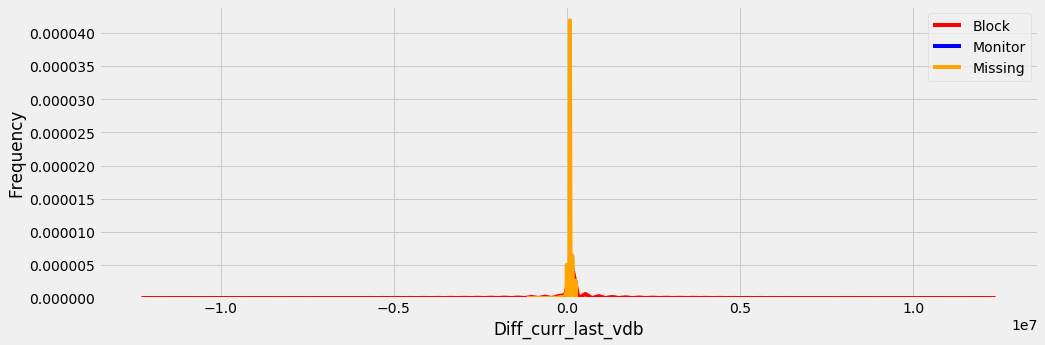

In [1651]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(processedData["Diff_curr_last_vdb"][(processedData["mod"] == 1) & (processedData["Diff_curr_last_vdb"].notnull())], color="Red", shade = True)
g = sns.kdeplot(processedData["Diff_curr_last_vdb"][(processedData["mod"] == 2) & (processedData["Diff_curr_last_vdb"].notnull())], ax =g, color="Blue", shade= True)
g = sns.kdeplot(processedData["Diff_curr_last_vdb"][(processedData["mod"] == -9999) & (processedData["Diff_curr_last_vdb"].notnull())], ax =g, color="Orange", shade= True)
g.set_xlabel("Diff_curr_last_vdb")
g.set_ylabel("Frequency")
g = g.legend(["Block","Monitor","Missing"])

there is no clear sepreation between visible 

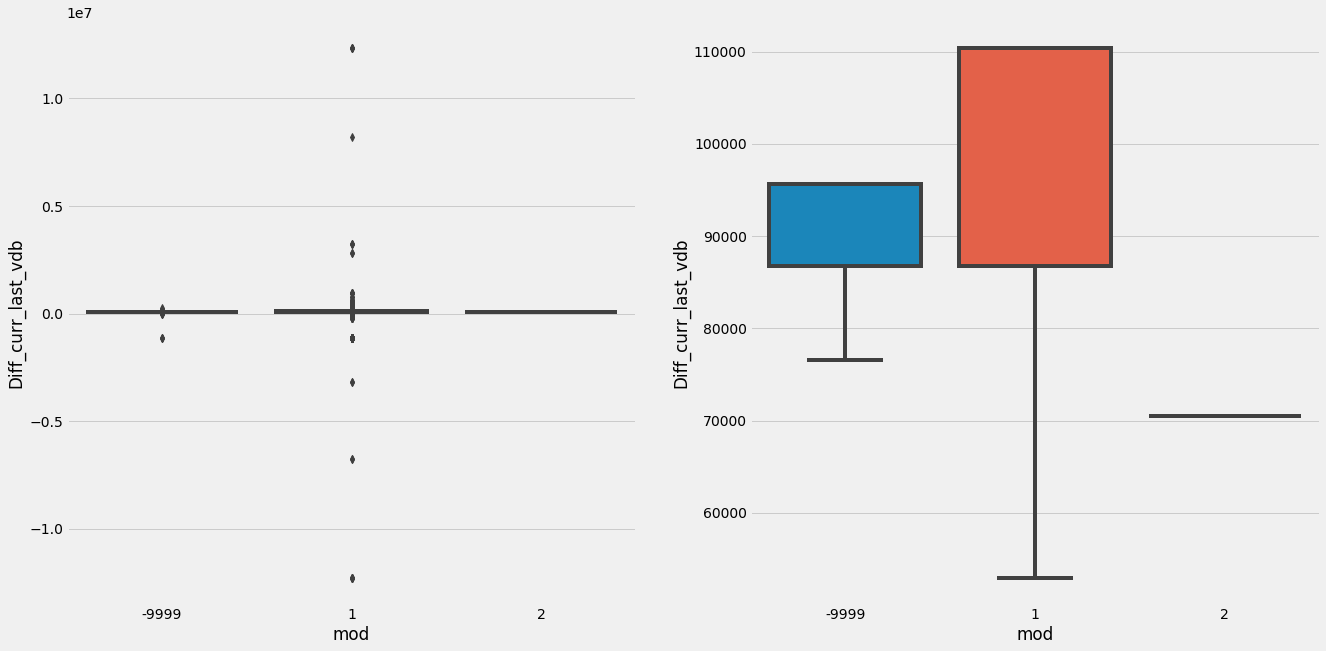

In [1652]:
fig,axarr = plt.subplots(1,2,figsize=(20,10))

sns.factorplot(y='Diff_curr_last_vdb',x='mod',data=processedData,kind='box',size=15,aspect=.4,showfliers=True,ax=axarr[0])
sns.factorplot(y='Diff_curr_last_vdb',x='mod',data=processedData,kind='box',size=15,aspect=.4,showfliers=False,ax=axarr[1])
plt.close(2)
plt.close(3)

we can certainly see some outliers available in for mod='blk'

In [1653]:
processedData['mod'].value_counts()

 1       7293
-9999      40
 2          7
Name: mod, dtype: int64

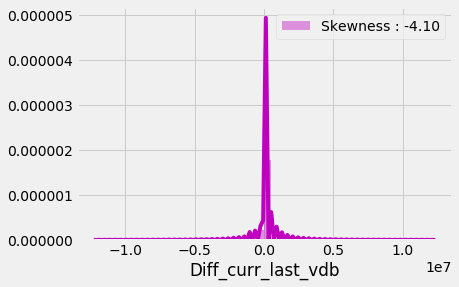

In [1654]:
g = sns.distplot(processedData["Diff_curr_last_vdb"], color="m", label="Skewness : %.2f"%(processedData["Diff_curr_last_vdb"].skew()))
g = g.legend(loc="best")

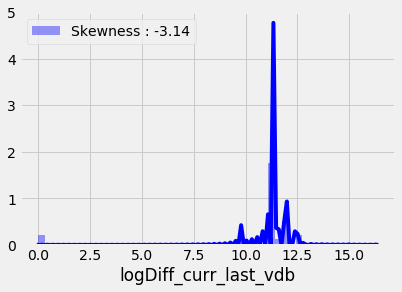

In [1655]:
### Log Transform ###
processedData["logDiff_curr_last_vdb"] = processedData["Diff_curr_last_vdb"].map(lambda i: np.log(i) if i > 0 else 0)
g = sns.distplot(processedData["logDiff_curr_last_vdb"], color="b", label="Skewness : %.2f"%(processedData["logDiff_curr_last_vdb"].skew()))
g = g.legend(loc="best")

In [1656]:
processedData.drop('logDiff_curr_last_vdb',axis=1,inplace=True)

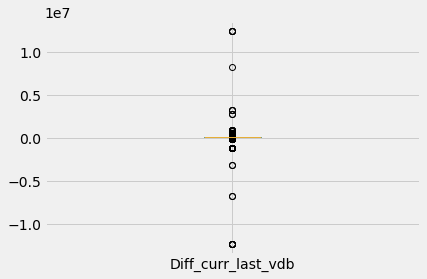

In [1657]:
processedData.Diff_curr_last_vdb.plot(kind='box')

##### Interaction between Time features with other features 

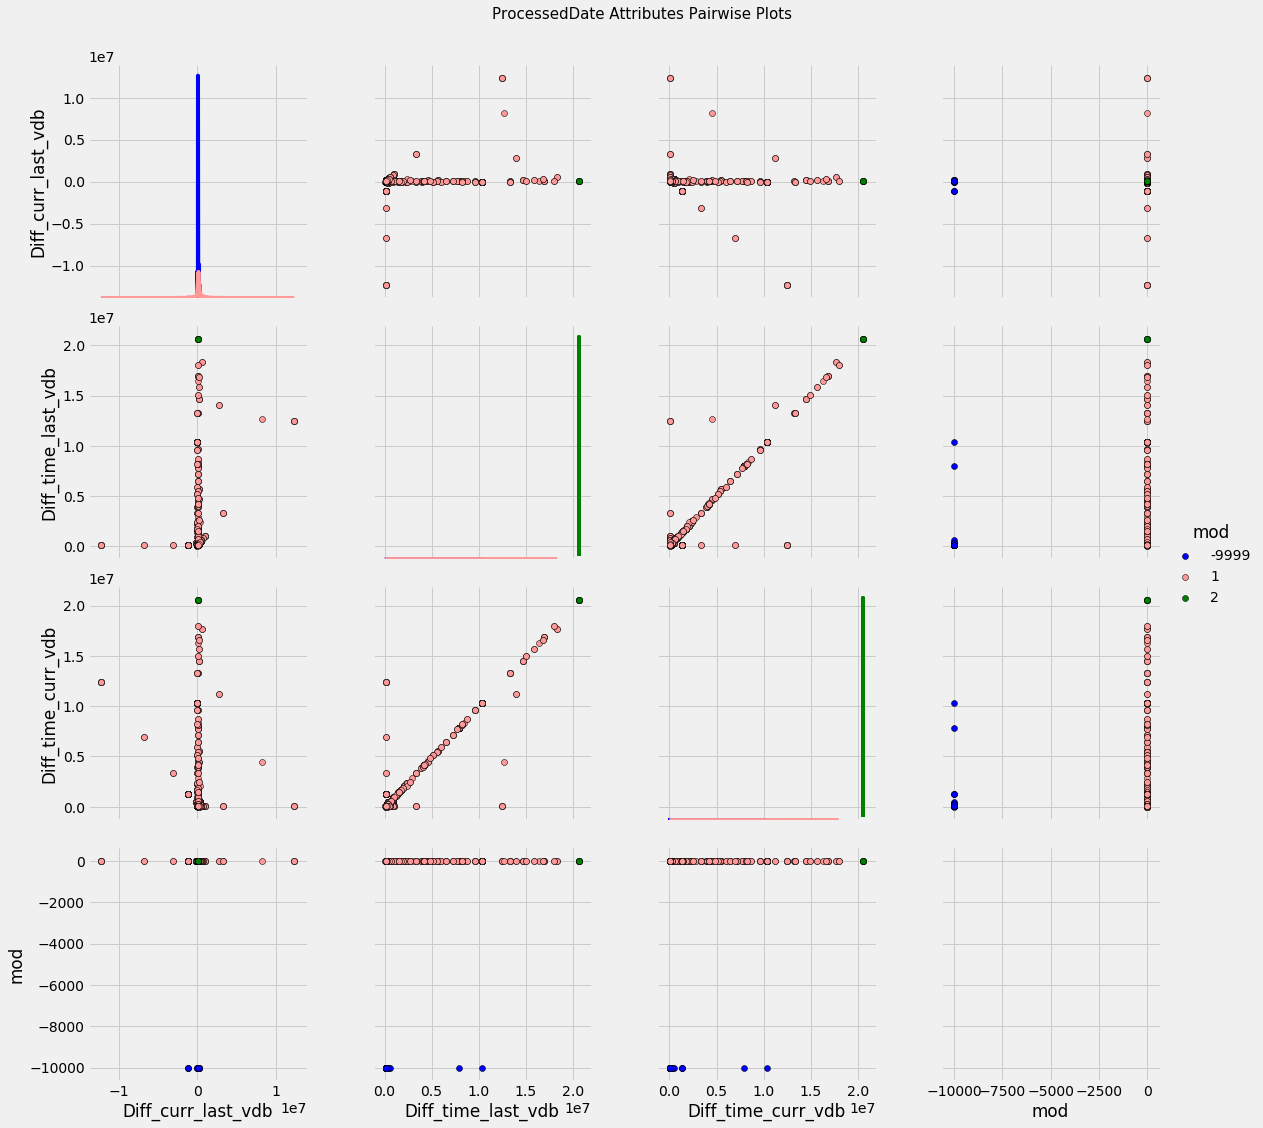

In [1658]:
cols = ['Diff_curr_last_vdb', 'Diff_time_last_vdb', 'Diff_time_curr_vdb', 'mod']
pp = sns.pairplot(processedData[cols], hue='mod', size=4, aspect=1, 
                  palette={1: "#FF9999", 2: "green",-9999:"blue"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('ProcessedDate Attributes Pairwise Plots', fontsize=15)

Diff_time_curr_vdb and Diff_time_last_vdb has skewed data .

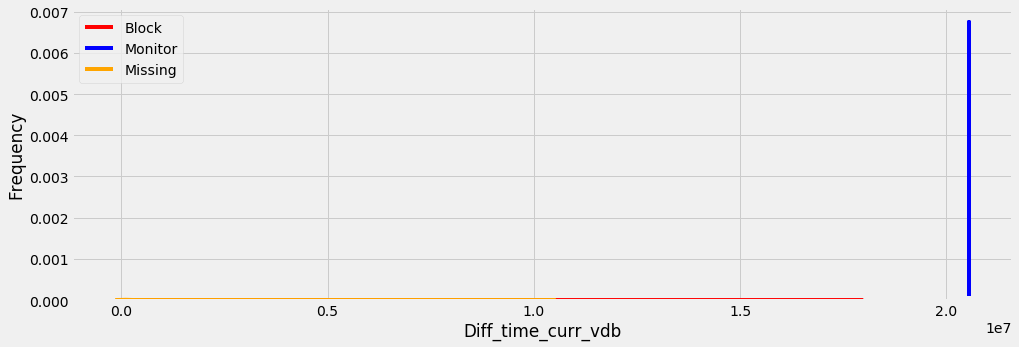

In [1659]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(processedData["Diff_time_curr_vdb"][(processedData["mod"] == 1) & (processedData["Diff_time_curr_vdb"].notnull())], color="Red", shade = True)
g = sns.kdeplot(processedData["Diff_time_curr_vdb"][(processedData["mod"] == 2) & (processedData["Diff_time_curr_vdb"].notnull())], ax =g, color="Blue", shade= True)
g = sns.kdeplot(processedData["Diff_time_curr_vdb"][(processedData["mod"] == -9999) & (processedData["Diff_time_curr_vdb"].notnull())], ax =g, color="Orange", shade= True)
g.set_xlabel("Diff_time_curr_vdb")
g.set_ylabel("Frequency")
g = g.legend(["Block","Monitor","Missing"])

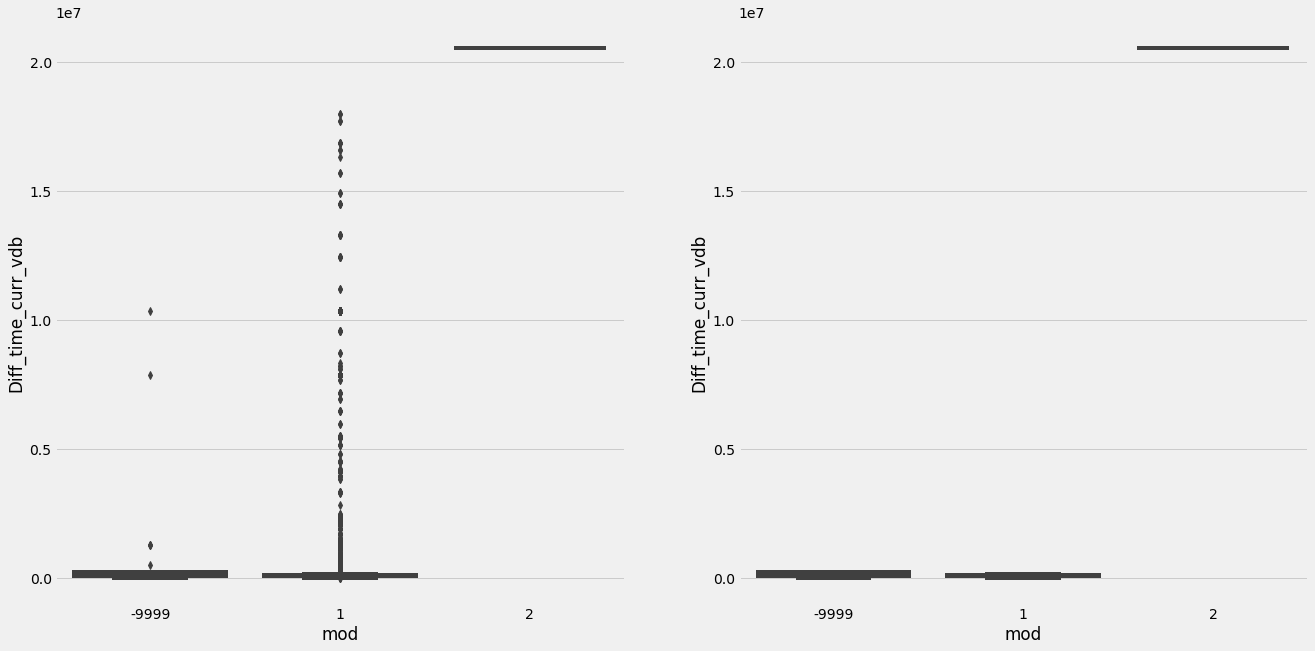

In [1660]:
fig,axarr = plt.subplots(1,2,figsize=(20,10))

sns.factorplot(y='Diff_time_curr_vdb',x='mod',data=processedData,kind='box',size=15,aspect=.4,showfliers=True,ax=axarr[0])
sns.factorplot(y='Diff_time_curr_vdb',x='mod',data=processedData,kind='box',size=15,aspect=.4,showfliers=False,ax=axarr[1])
plt.close(2)
plt.close(3)

i could understand that the Viruse database version is quite upto date for the blocked ones. I was expecting it to be otherwise

In [1661]:
processedData[['Diff_curr_last_vdb', 'Diff_time_last_vdb', 'Diff_time_curr_vdb']].describe()

,Diff_curr_last_vdb,Diff_time_last_vdb,Diff_time_curr_vdb
count,7340.00000000,7340.00000000,7340.00000000
mean,81617.25136240,682608.54945504,600991.29809264
std,517398.64814601,2073494.87833120,2088210.51674436
min,-12273785.00000000,80400.00000000,17294.00000000
25%,86785.00000000,167129.00000000,80328.00000000
50%,86789.00000000,167229.00000000,80406.00000000
75%,105192.00000000,235789.00000000,122082.00000000
max,12360590.00000000,20625943.00000000,20555426.00000000


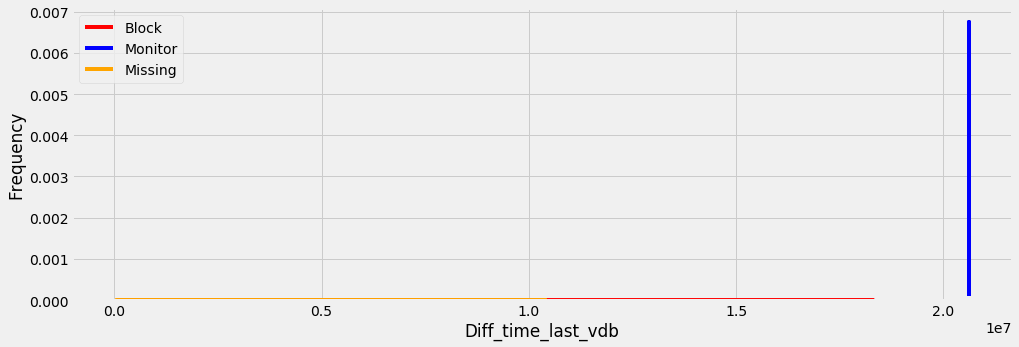

In [1662]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(processedData["Diff_time_last_vdb"][(processedData["mod"] == 1) & (processedData["Diff_time_last_vdb"].notnull())], color="Red", shade = True)
g = sns.kdeplot(processedData["Diff_time_last_vdb"][(processedData["mod"] == 2) & (processedData["Diff_time_last_vdb"].notnull())], ax =g, color="Blue", shade= True)
g = sns.kdeplot(processedData["Diff_time_last_vdb"][(processedData["mod"] == -9999) & (processedData["Diff_time_last_vdb"].notnull())], ax =g, color="Orange", shade= True)
g.set_xlabel("Diff_time_last_vdb")
g.set_ylabel("Frequency")
g = g.legend(["Block","Monitor","Missing"])

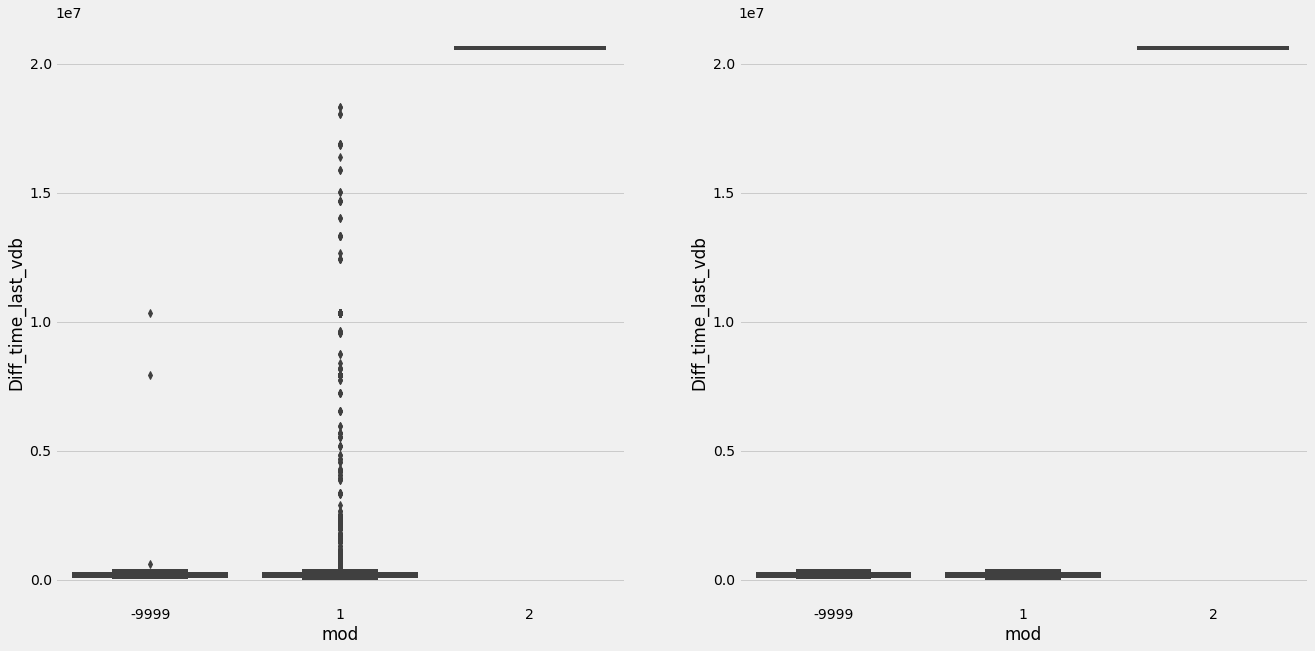

In [1663]:
fig,axarr = plt.subplots(1,2,figsize=(20,10))

sns.factorplot(y='Diff_time_last_vdb',x='mod',data=processedData,kind='box',size=15,aspect=.4,showfliers=True,ax=axarr[0])
sns.factorplot(y='Diff_time_last_vdb',x='mod',data=processedData,kind='box',size=15,aspect=.4,showfliers=False,ax=axarr[1])
plt.close(2)
plt.close(3)

the distribution is same as above i was expecting some difference in the last update and current date 

#### Diff_time_last_vdb

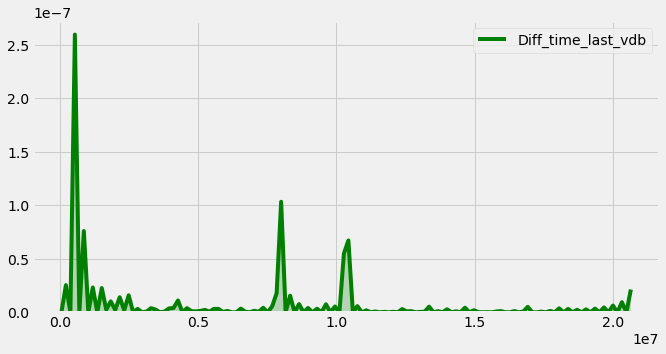

In [1664]:
plt.figure(figsize=(10,5))
sns.kdeplot(processedData["Diff_time_last_vdb"][(processedData["Diff_time_last_vdb"].notnull())], color="green", shade = True)

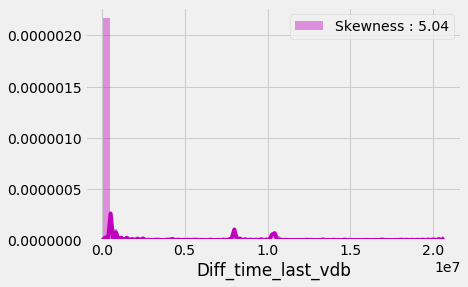

In [1665]:
g = sns.distplot(processedData["Diff_time_last_vdb"], color="m", label="Skewness : %.2f"%(processedData["Diff_time_last_vdb"].skew()))
g = g.legend(loc="best")

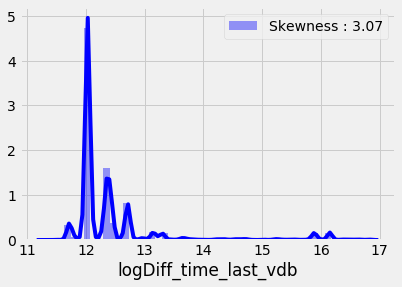

In [1666]:
### Log Transform ###
processedData["logDiff_time_last_vdb"] = processedData["Diff_time_last_vdb"].map(lambda i: np.log(i) if i > 0 else 0)
g = sns.distplot(processedData["logDiff_time_last_vdb"], color="b", label="Skewness : %.2f"%(processedData["logDiff_time_last_vdb"].skew()))
g = g.legend(loc="best")

In [1667]:
processedData.drop('logDiff_time_last_vdb',axis=1,inplace=True)

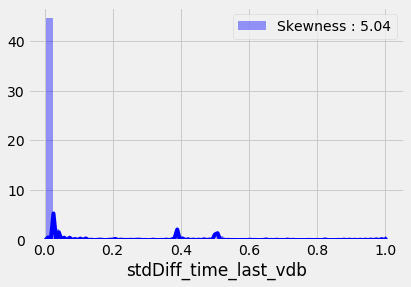

In [1668]:
### Standardized Transform ###
processedData["stdDiff_time_last_vdb"] = processedData["Diff_time_last_vdb"].map(lambda i: i/((processedData.Diff_time_last_vdb.max())-(processedData.Diff_time_last_vdb.min())) if i > 0 else 0)
g = sns.distplot(processedData["stdDiff_time_last_vdb"], color="b", label="Skewness : %.2f"%(processedData["stdDiff_time_last_vdb"].skew()))
g = g.legend(loc="best")

In [1669]:
processedData.drop('stdDiff_time_last_vdb',axis=1,inplace=True)

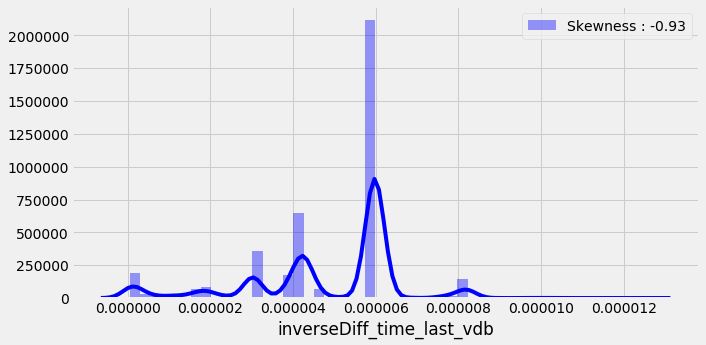

In [1670]:
#### Inverse Transform ####
plt.figure(figsize=(10,5))
processedData["inverseDiff_time_last_vdb"] = processedData["Diff_time_last_vdb"].map(lambda i: 1/i if i > 0 else 0)
g = sns.distplot(processedData["inverseDiff_time_last_vdb"], color="b", label="Skewness : %.2f"%(processedData["inverseDiff_time_last_vdb"].skew()))
g = g.legend(loc="best")

In [1671]:
#processedData.drop('inverseDiff_time_last_vdb',axis=1,inplace=True)

In [1672]:
processedData.Diff_time_last_vdb.max()

20625943.0

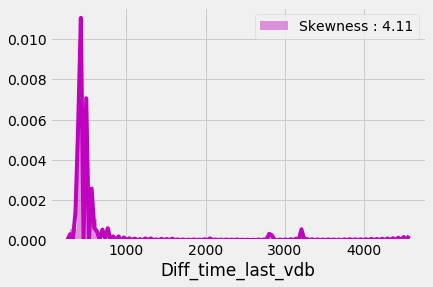

In [1673]:
## Square Root Transform ##
g = sns.distplot(processedData["Diff_time_last_vdb"].pow(1./2), color="m", label="Skewness : %.2f"%(processedData["Diff_time_last_vdb"].pow(1./2).skew()))
g = g.legend(loc="best")

It seems inverse transform help in reducing the skeweness

#### Diff_time_curr_vdb

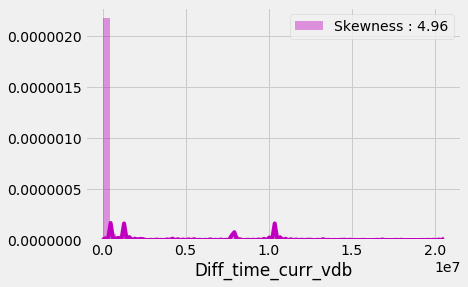

In [1674]:
g = sns.distplot(processedData["Diff_time_curr_vdb"], color="m", label="Skewness : %.2f"%(processedData["Diff_time_curr_vdb"].skew()))
g = g.legend(loc="best")

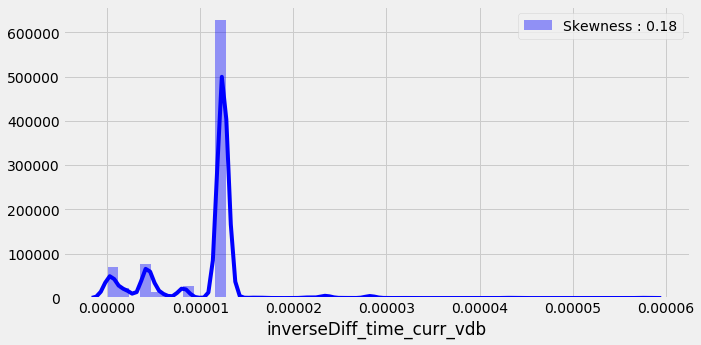

In [1675]:
#### Inverse Transform ####
plt.figure(figsize=(10,5))
processedData["inverseDiff_time_curr_vdb"] = processedData["Diff_time_curr_vdb"].map(lambda i: 1/i if i > 0 else 0)
g = sns.distplot(processedData["inverseDiff_time_curr_vdb"], color="b", label="Skewness : %.2f"%(processedData["inverseDiff_time_curr_vdb"].skew()))
g = g.legend(loc="best")

In [1676]:
processedData.isnull().sum()

LocalIP_Length                  0
RemoteIP_Length                 0
dir                             0
isValidLocalIP                  0
isValidRemoteIP                 0
localPort                       0
isValidLocalPort                0
remotePort                      0
isValidRemotePort               0
mod                             0
nm                            401
prod                          401
productId                       1
protocol                      400
sigid                         401
sigwid                        400
pkhash                          3
company_name                  277
machine_type                  279
os_arch                       281
os_id                         278
os_name                       278
product_name                  278
product_version               277
sp_minor_version              278
sp_major_version              279
trial_copy                    281
vdb_timestamp                   0
vertical_id                   289
city_name     

#### Time Features interaction with IP based feature

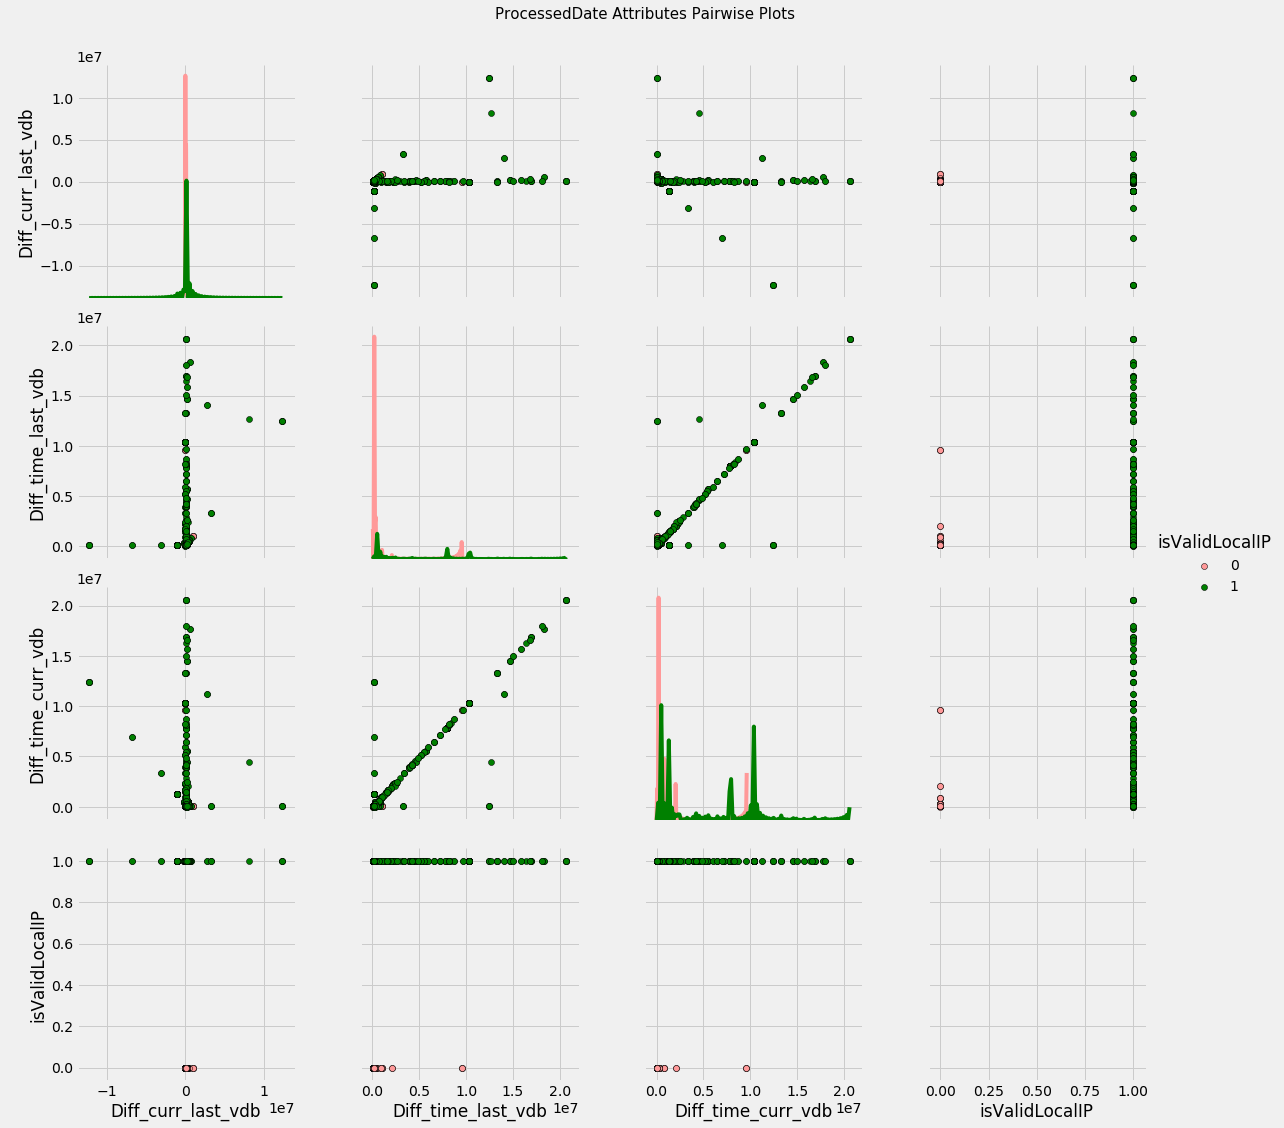

In [1677]:
cols = ['Diff_curr_last_vdb', 'Diff_time_last_vdb', 'Diff_time_curr_vdb', 'isValidLocalIP']
pp = sns.pairplot(processedData[cols], hue='isValidLocalIP', size=4, aspect=1, 
                  palette={0: "#FF9999", 1: "green"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('ProcessedDate Attributes Pairwise Plots', fontsize=15)

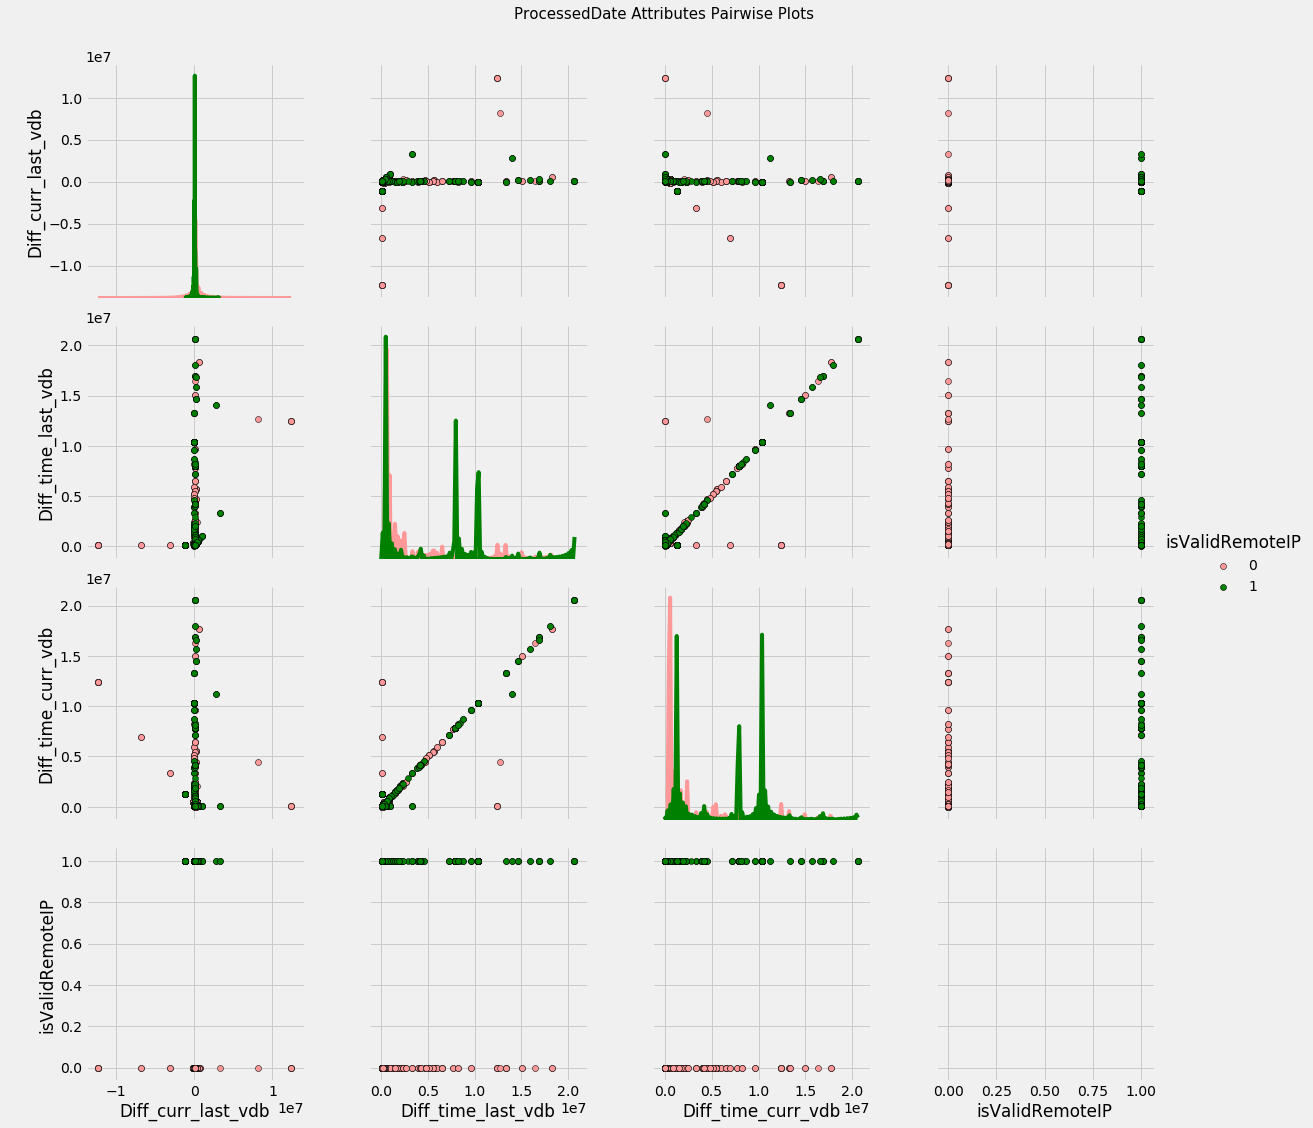

In [1678]:
cols = ['Diff_curr_last_vdb', 'Diff_time_last_vdb', 'Diff_time_curr_vdb', 'isValidRemoteIP']
pp = sns.pairplot(processedData[cols], hue='isValidRemoteIP', size=4, aspect=1, 
                  palette={0: "#FF9999", 1: "green"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('ProcessedDate Attributes Pairwise Plots', fontsize=15)

### Handling NaN ###

I would keep the NaN's as is such that model interprets it as missing.

In [1679]:
for col in processedData.columns:
    processedData[col].fillna('-9999',inplace=True)

In [1680]:
processedData.isnull().sum()

LocalIP_Length               0
RemoteIP_Length              0
dir                          0
isValidLocalIP               0
isValidRemoteIP              0
localPort                    0
isValidLocalPort             0
remotePort                   0
isValidRemotePort            0
mod                          0
nm                           0
prod                         0
productId                    0
protocol                     0
sigid                        0
sigwid                       0
pkhash                       0
company_name                 0
machine_type                 0
os_arch                      0
os_id                        0
os_name                      0
product_name                 0
product_version              0
sp_minor_version             0
sp_major_version             0
trial_copy                   0
vdb_timestamp                0
vertical_id                  0
city_name                    0
country_name                 0
real_region_name             0
timestam

### Feature Engineering 

Since most of the columns are categorical columns there can be multiple approches taken to create features which are as follows :
    1. One-Hot Encoding
    2. Label Encoding
    3. Frequency Encoding
I will convert the categorical variable to there corresponing frequency thus, retaining the importance in-terms of there occurance

In [1681]:
processedData.dtypes

LocalIP_Length                 int64
RemoteIP_Length                int64
dir                            int32
isValidLocalIP                 int32
isValidRemoteIP                int32
localPort                      int64
isValidLocalPort               int32
remotePort                     int64
isValidRemotePort              int32
mod                            int32
nm                            object
prod                          object
productId                     object
protocol                      object
sigid                         object
sigwid                        object
pkhash                        object
company_name                  object
machine_type                  object
os_arch                       object
os_id                         object
os_name                       object
product_name                  object
product_version               object
sp_minor_version              object
sp_major_version              object
trial_copy                    object
v

In [1682]:
processedData.head()

,LocalIP_Length,RemoteIP_Length,dir,isValidLocalIP,isValidRemoteIP,localPort,isValidLocalPort,remotePort,isValidRemotePort,mod,nm,prod,productId,protocol,sigid,sigwid,pkhash,company_name,machine_type,os_arch,os_id,os_name,product_name,product_version,sp_minor_version,sp_major_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name,timestamp,last_vdb_timestamp,timestamp_epoch,last_vdb_timestamp_epoch,vdb_timestamp_epoch,Diff_curr_last_vdb,Diff_time_last_vdb,Diff_time_curr_vdb,inverseDiff_time_last_vdb,inverseDiff_time_curr_vdb
0,13,14,0,1,0,94444,0,62390,1,1,-9999,-9999,qhpdt4,-9999,-9999,-9999,7fb5ef7c0113bd557ada5c0445ec91,qhcomp1,DESKTOP,64Bit,50040,Windows Server 2012 R2 64 bit,qhpname3,qhpver0,0,0.00000000,0.00000000,"01 March, 2019 (08:08:51)",government,city141,country4,region31,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)",1551431091.00000000,1551331325.00000000,1551407931.00000000,76606.00000000,99766.00000000,23160.00000000,0.00001002,0.00004318
1,14,15,0,1,0,734034,0,49915,1,1,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,31780.00000000,qhcltr4,5194279487c0779a605e969aa950d338,qhcomp1,DESKTOP,32Bit,50016,Windows XP Professional,qhpname6,qhpver0,0,3.00000000,0.00000000,"01 March, 2019 (08:08:31)",it,city170,country4,region40,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)",1551431091.00000000,1551331325.00000000,1551407911.00000000,76586.00000000,99766.00000000,23180.00000000,0.00001002,0.00004314
2,13,14,0,1,0,94444,0,62390,1,1,-9999,-9999,qhpdt4,-9999,-9999,-9999,7fb5ef7c0113bd557ada5c0445ec91,qhcomp1,DESKTOP,64Bit,50040,Windows Server 2012 R2 64 bit,qhpname3,qhpver0,0,0.00000000,0.00000000,"01 March, 2019 (08:08:51)",finance,city141,country4,region31,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)",1551431091.00000000,1551331325.00000000,1551407931.00000000,76606.00000000,99766.00000000,23160.00000000,0.00001002,0.00004318
3,14,15,0,0,0,734034,0,49915,1,-9999,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,31780.00000000,qhcltr4,5194279487c0779a605e969aa950d338,qhcomp1,DESKTOP,32Bit,50016,Windows XP Professional,qhpname6,qhpver0,0,3.00000000,0.00000000,"01 March, 2019 (08:08:31)",it,city170,country4,region40,2019-03-01T14:34:51.000Z,"28 February, 2019 (10:52:05)",1551431091.00000000,1551331325.00000000,1551407911.00000000,76586.00000000,99766.00000000,23180.00000000,0.00001002,0.00004314
4,13,13,0,1,1,94444,0,414811,0,1,-9999,-9999,qhpdt9,-9999,-9999,-9999,df4c090f2a82fc8323f90bb6ee374c19,qhcomp1,DESKTOP,-9999,50033,Windows 7 64 bit,qhpname7,qhpver0,0,1.00000000,0.00000000,"03 March, 2019 (08:09:50)",finance,-9999,country4,-9999,2019-03-04T06:27:25.000Z,"02 March, 2019 (08:03:25)",1551661045.00000000,1551494005.00000000,1551580790.00000000,86785.00000000,167040.00000000,80255.00000000,0.00000599,0.00001246


In [1683]:
processedData.os_id = pd.to_numeric(processedData.os_id)

In [1684]:
processedData.trial_copy = pd.to_numeric(processedData.trial_copy)

In [1685]:
processedData.sigid = pd.to_numeric(processedData.sigid)

In [1686]:
processedData.sp_minor_version = pd.to_numeric(processedData.sp_minor_version)

In [1687]:
processedData.sp_major_version = pd.to_numeric(processedData.sp_major_version)

==================================================================

In [1688]:
FeatureEngineeredDF = pd.DataFrame()

#### categorical Features ###

##### Data Type Change #####

In [1689]:
FeatureEngineeredDF = processedData[processedData.columns[~processedData.columns.isin(['vdb_timestamp','timestamp','last_vdb_timestamp'])]].select_dtypes(include=['object'])

converting the cadinal columns to there respective frequency

In [1690]:
for col in FeatureEngineeredDF.columns:
    FeatureEngineeredDF[col]= FeatureEngineeredDF[col].map(FeatureEngineeredDF[col].value_counts().to_dict())

FeatureEngineeredDF=FeatureEngineeredDF.div(FeatureEngineeredDF.shape[0])

In [1691]:
FeatureEngineeredDF.head()

,nm,prod,productId,protocol,sigwid,pkhash,company_name,machine_type,os_arch,os_name,product_name,product_version,vertical_id,city_name,country_name,real_region_name
0,0.05463215,0.05463215,0.05054496,0.05449591,0.05449591,0.00027248,0.86920981,0.82656676,0.48542234,0.01880109,0.05040872,0.87302452,0.10776567,0.03392371,0.95490463,0.04414169
1,0.25899183,0.35095368,0.22098093,0.66594005,0.61471390,0.00027248,0.86920981,0.82656676,0.47629428,0.12438692,0.22588556,0.87302452,0.10585831,0.00027248,0.95490463,0.00395095
2,0.05463215,0.05463215,0.05054496,0.05449591,0.05449591,0.00027248,0.86920981,0.82656676,0.48542234,0.01880109,0.05040872,0.87302452,0.11267030,0.03392371,0.95490463,0.04414169
3,0.25899183,0.35095368,0.22098093,0.66594005,0.61471390,0.00027248,0.86920981,0.82656676,0.47629428,0.12438692,0.22588556,0.87302452,0.10585831,0.00027248,0.95490463,0.00395095
4,0.05463215,0.05463215,0.17915531,0.05449591,0.05449591,0.00027248,0.86920981,0.82656676,0.03828338,0.31880109,0.24264305,0.87302452,0.11267030,0.20980926,0.95490463,0.20149864


#### Boolean Features ####

In [1692]:
FeatureEngineeredDF['dir'] = processedData.dir.copy()
FeatureEngineeredDF['mod'] = processedData['mod'].copy()

#### Continous Features ####

In [1693]:
processedData.select_dtypes(exclude='object').head()

,LocalIP_Length,RemoteIP_Length,dir,isValidLocalIP,isValidRemoteIP,localPort,isValidLocalPort,remotePort,isValidRemotePort,mod,sigid,os_id,sp_minor_version,sp_major_version,trial_copy,timestamp_epoch,last_vdb_timestamp_epoch,vdb_timestamp_epoch,Diff_curr_last_vdb,Diff_time_last_vdb,Diff_time_curr_vdb,inverseDiff_time_last_vdb,inverseDiff_time_curr_vdb
0,13,14,0,1,0,94444,0,62390,1,1,-9999.00000000,50040,0,0.00000000,0.00000000,1551431091.00000000,1551331325.00000000,1551407931.00000000,76606.00000000,99766.00000000,23160.00000000,0.00001002,0.00004318
1,14,15,0,1,0,734034,0,49915,1,1,31780.00000000,50016,0,3.00000000,0.00000000,1551431091.00000000,1551331325.00000000,1551407911.00000000,76586.00000000,99766.00000000,23180.00000000,0.00001002,0.00004314
2,13,14,0,1,0,94444,0,62390,1,1,-9999.00000000,50040,0,0.00000000,0.00000000,1551431091.00000000,1551331325.00000000,1551407931.00000000,76606.00000000,99766.00000000,23160.00000000,0.00001002,0.00004318
3,14,15,0,0,0,734034,0,49915,1,-9999,31780.00000000,50016,0,3.00000000,0.00000000,1551431091.00000000,1551331325.00000000,1551407911.00000000,76586.00000000,99766.00000000,23180.00000000,0.00001002,0.00004314
4,13,13,0,1,1,94444,0,414811,0,1,-9999.00000000,50033,0,1.00000000,0.00000000,1551661045.00000000,1551494005.00000000,1551580790.00000000,86785.00000000,167040.00000000,80255.00000000,0.00000599,0.00001246


In [1694]:
for col in processedData[['localPort','remotePort','sigid','os_id','sp_minor_version','sp_major_version']].columns:
    FeatureEngineeredDF[col]= processedData[col].map(processedData[col].value_counts().to_dict())

FeatureEngineeredDF[['localPort','remotePort','sigid','os_id','sp_minor_version','sp_major_version']]=FeatureEngineeredDF[['localPort','remotePort','sigid','os_id','sp_minor_version','sp_major_version']].div(FeatureEngineeredDF.shape[0])

In [1695]:
FeatureEngineeredDF.head()

,nm,prod,productId,protocol,sigwid,pkhash,company_name,machine_type,os_arch,os_name,product_name,product_version,vertical_id,city_name,country_name,real_region_name,dir,mod,localPort,remotePort,sigid,os_id,sp_minor_version,sp_major_version
0,0.05463215,0.05463215,0.05054496,0.05449591,0.05449591,0.00027248,0.86920981,0.82656676,0.48542234,0.01880109,0.05040872,0.87302452,0.10776567,0.03392371,0.95490463,0.04414169,0,1,0.05504087,0.00027248,0.05463215,0.01880109,0.96198910,0.32643052
1,0.25899183,0.35095368,0.22098093,0.66594005,0.61471390,0.00027248,0.86920981,0.82656676,0.47629428,0.12438692,0.22588556,0.87302452,0.10585831,0.00027248,0.95490463,0.00395095,0,1,0.00122616,0.00027248,0.25899183,0.12438692,0.96198910,0.10136240
2,0.05463215,0.05463215,0.05054496,0.05449591,0.05449591,0.00027248,0.86920981,0.82656676,0.48542234,0.01880109,0.05040872,0.87302452,0.11267030,0.03392371,0.95490463,0.04414169,0,1,0.05504087,0.00027248,0.05463215,0.01880109,0.96198910,0.32643052
3,0.25899183,0.35095368,0.22098093,0.66594005,0.61471390,0.00027248,0.86920981,0.82656676,0.47629428,0.12438692,0.22588556,0.87302452,0.10585831,0.00027248,0.95490463,0.00395095,0,-9999,0.00122616,0.00027248,0.25899183,0.12438692,0.96198910,0.10136240
4,0.05463215,0.05463215,0.17915531,0.05449591,0.05449591,0.00027248,0.86920981,0.82656676,0.03828338,0.31880109,0.24264305,0.87302452,0.11267030,0.20980926,0.95490463,0.20149864,0,1,0.05504087,0.00027248,0.05463215,0.31880109,0.96198910,0.50871935


#### IP based Features #####

In [1696]:
FeatureEngineeredDF['LocalIP_Length'] = processedData.LocalIP_Length.copy()
FeatureEngineeredDF['RemoteIP_Length'] = processedData.RemoteIP_Length.copy()
FeatureEngineeredDF['isValidLocalIP'] = processedData.isValidLocalIP.copy()
FeatureEngineeredDF['isValidRemoteIP'] = processedData.isValidRemoteIP.copy()

#### Timestamp Based Features ####

##### Epoch Time Difference #####

In [1697]:
FeatureEngineeredDF['Diff_curr_last_vdb'] = processedData.Diff_curr_last_vdb.copy()
FeatureEngineeredDF['inverseDiff_time_last_vdb'] = processedData.inverseDiff_time_last_vdb.copy()
FeatureEngineeredDF['inverseDiff_time_curr_vdb'] = processedData.inverseDiff_time_curr_vdb.copy()
FeatureEngineeredDF['Diff_time_curr_vdb'] = processedData.Diff_time_curr_vdb.copy()
FeatureEngineeredDF['Diff_time_last_vdb'] = processedData.Diff_time_last_vdb.copy()

##### Sin & Cos #####

In [1698]:
def vdb_sin_cos(DF,col):
    sin=[]
    cos=[]
    for e in DF[col]:
        a= float(e[-9:-7]) * 3600 + float(e[-6:-4]) * 60 + float(e[-3:-1])
        b=np.sin(2*np.pi*a/86400.0)
        c=np.cos(2*np.pi*a/86400.0)
        sin.append(b)
        cos.append(c)
    return sin, cos
def detection_sin_cos(DF,col):
    sin=[]
    cos=[]
    for e in DF[col]:
        a= float(e[-13:-11]) * 3600 + float(e[-10:-8]) * 60 + float(e[-7:-5])
        b=np.sin(2*np.pi*a/86400.0)
        c=np.cos(2*np.pi*a/86400.0)
        sin.append(b)
        cos.append(c)
    return sin, cos

In [1699]:
FeatureEngineeredDF['currVDB_Sin'],FeatureEngineeredDF['currVDB_Cos'] = vdb_sin_cos(processedData,'vdb_timestamp')

In [1700]:
FeatureEngineeredDF['lastVDB_Sin'],FeatureEngineeredDF['lastVDB_Cos'] = vdb_sin_cos(processedData,'last_vdb_timestamp')

In [1701]:
FeatureEngineeredDF['DectTime_Sin'],FeatureEngineeredDF['DecTime_Cos'] = detection_sin_cos(processedData,'timestamp')

In [1702]:
FeatureEngineeredDF.head()

,nm,prod,productId,protocol,sigwid,pkhash,company_name,machine_type,os_arch,os_name,product_name,product_version,vertical_id,city_name,country_name,real_region_name,dir,mod,localPort,remotePort,sigid,os_id,sp_minor_version,sp_major_version,LocalIP_Length,RemoteIP_Length,isValidLocalIP,isValidRemoteIP,Diff_curr_last_vdb,inverseDiff_time_last_vdb,inverseDiff_time_curr_vdb,Diff_time_curr_vdb,Diff_time_last_vdb,currVDB_Sin,currVDB_Cos,lastVDB_Sin,lastVDB_Cos,DectTime_Sin,DecTime_Cos
0,0.05463215,0.05463215,0.05054496,0.05449591,0.05449591,0.00027248,0.86920981,0.82656676,0.48542234,0.01880109,0.05040872,0.87302452,0.10776567,0.03392371,0.95490463,0.04414169,0,1,0.05504087,0.00027248,0.05463215,0.01880109,0.96198910,0.32643052,13,14,1,0,76606.00000000,0.00001002,0.00004318,23160.00000000,99766.00000000,0.84607689,-0.53306087,0.29202396,-0.95641100,-0.62541290,-0.78029398
1,0.25899183,0.35095368,0.22098093,0.66594005,0.61471390,0.00027248,0.86920981,0.82656676,0.47629428,0.12438692,0.22588556,0.87302452,0.10585831,0.00027248,0.95490463,0.00395095,0,1,0.00122616,0.00027248,0.25899183,0.12438692,0.96198910,0.10136240,14,15,1,0,76586.00000000,0.00001002,0.00004314,23180.00000000,99766.00000000,0.84685130,-0.53182974,0.29202396,-0.95641100,-0.62541290,-0.78029398
2,0.05463215,0.05463215,0.05054496,0.05449591,0.05449591,0.00027248,0.86920981,0.82656676,0.48542234,0.01880109,0.05040872,0.87302452,0.11267030,0.03392371,0.95490463,0.04414169,0,1,0.05504087,0.00027248,0.05463215,0.01880109,0.96198910,0.32643052,13,14,1,0,76606.00000000,0.00001002,0.00004318,23160.00000000,99766.00000000,0.84607689,-0.53306087,0.29202396,-0.95641100,-0.62541290,-0.78029398
3,0.25899183,0.35095368,0.22098093,0.66594005,0.61471390,0.00027248,0.86920981,0.82656676,0.47629428,0.12438692,0.22588556,0.87302452,0.10585831,0.00027248,0.95490463,0.00395095,0,-9999,0.00122616,0.00027248,0.25899183,0.12438692,0.96198910,0.10136240,14,15,0,0,76586.00000000,0.00001002,0.00004314,23180.00000000,99766.00000000,0.84685130,-0.53182974,0.29202396,-0.95641100,-0.62541290,-0.78029398
4,0.05463215,0.05463215,0.17915531,0.05449591,0.05449591,0.00027248,0.86920981,0.82656676,0.03828338,0.31880109,0.24264305,0.87302452,0.11267030,0.20980926,0.95490463,0.20149864,0,1,0.05504087,0.00027248,0.05463215,0.31880109,0.96198910,0.50871935,13,13,1,1,86785.00000000,0.00000599,0.00001246,80255.00000000,167040.00000000,0.84378196,-0.53668613,0.85847543,-0.51285469,0.99285313,-0.11934265


In [1703]:
FeatureEngineeredDF.shape

(7340, 39)

### Feature Selection ###

##### Correlation ######

In [1704]:
def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='coolwarm')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

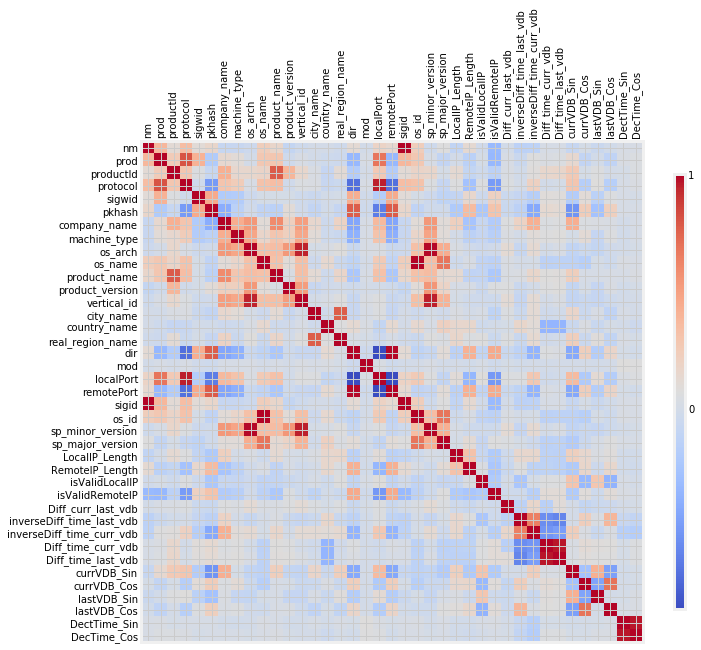

In [1705]:
plot_corr(FeatureEngineeredDF)

In [1706]:
corr_matrix = FeatureEngineeredDF.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(drop)

['localPort', 'remotePort', 'sigid', 'os_id', 'sp_minor_version', 'Diff_time_last_vdb', 'DecTime_Cos']


In [1707]:
print('Pre-Feature Selection',FeatureEngineeredDF.shape)
FeatureEngineeredDF=FeatureEngineeredDF.drop(drop,axis=1)
print('Post-Feature Selection',FeatureEngineeredDF.shape)

Pre-Feature Selection (7340, 39)
Post-Feature Selection (7340, 32)


###### Zero-Variance 

In [1708]:
varaianceDF=FeatureEngineeredDF.var().reset_index()
varaianceDF.columns=['Feature','Variance']
varaianceDF=varaianceDF.sort_values(by=['Variance'])
varaianceDF.head()

,Feature,Variance
24,inverseDiff_time_last_vdb,0.00000000
25,inverseDiff_time_curr_vdb,0.00000000
5,pkhash,0.00008759
12,vertical_id,0.00018098
31,DectTime_Sin,0.00142523


Dropping column based on zero variance test 

In [1709]:
FeatureEngineeredDF.drop(['inverseDiff_time_last_vdb','inverseDiff_time_curr_vdb','pkhash'],axis=1,inplace=True)

In [1711]:
FeatureEngineeredDF.shape

(7340, 29)

### Feature Normalization || Scaling ###

##### Import Library ######

In [1382]:
from sklearn.preprocessing import MinMaxScaler

In [1712]:
FeatureEngineeredDF.describe()

,nm,prod,productId,protocol,sigwid,company_name,machine_type,os_arch,os_name,product_name,product_version,vertical_id,city_name,country_name,real_region_name,dir,mod,sp_major_version,LocalIP_Length,RemoteIP_Length,isValidLocalIP,isValidRemoteIP,Diff_curr_last_vdb,Diff_time_curr_vdb,currVDB_Sin,currVDB_Cos,lastVDB_Sin,lastVDB_Cos,DectTime_Sin
count,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000,7340.00000000
mean,0.24490144,0.30444550,0.15648646,0.51790807,0.48044989,0.76560851,0.70299664,0.46395671,0.24967689,0.18470625,0.77155926,0.10416738,0.06963293,0.91256313,0.09905902,0.26811989,-53.49495913,0.37770672,13.03610354,13.90926431,0.92779292,0.62302452,81617.25136240,600991.29809264,0.62595788,-0.47497551,0.49460484,-0.56114929,0.99106465
std,0.08652872,0.06956227,0.07365182,0.21519866,0.18164035,0.26725105,0.27030531,0.08505303,0.12074893,0.08240735,0.26620484,0.01345281,0.07643483,0.19486463,0.07119462,0.44331802,736.24946793,0.15776888,0.89930652,1.16995417,0.25884812,0.48466171,517398.64814601,2088210.51674436,0.49897140,0.36558812,0.56280183,0.35184038,0.03775223
min,0.00027248,0.00027248,0.00013624,0.01253406,0.00027248,0.03773842,0.03801090,0.03828338,0.00027248,0.01634877,0.03773842,0.03937330,0.00013624,0.00027248,0.00027248,0.00000000,-9999.00000000,0.00013624,9.00000000,6.00000000,0.00000000,0.00000000,-12273785.00000000,17294.00000000,-0.99613105,-0.99983474,-0.99585799,-0.99986851,-0.62541290
25%,0.25899183,0.26498638,0.07711172,0.26702997,0.31539510,0.86920981,0.82656676,0.47629428,0.12438692,0.07670300,0.87302452,0.10585831,0.01580381,0.95490463,0.03133515,0.00000000,1.00000000,0.32643052,12.00000000,13.00000000,1.00000000,0.00000000,86785.00000000,80328.00000000,0.84378196,-0.53668613,0.29202396,-0.94615600,0.99148279
50%,0.26498638,0.32874659,0.17915531,0.66594005,0.61471390,0.86920981,0.82656676,0.47629428,0.31880109,0.22588556,0.87302452,0.10694823,0.03392371,0.95490463,0.08719346,0.00000000,1.00000000,0.50871935,13.00000000,14.00000000,1.00000000,1.00000000,86789.00000000,80406.00000000,0.84440585,-0.53570399,0.85847543,-0.51285469,0.99189444
75%,0.31362398,0.35095368,0.22098093,0.66594005,0.61471390,0.86920981,0.82656676,0.48542234,0.34618529,0.24128065,0.87302452,0.10776567,0.08065395,0.95490463,0.16267030,1.00000000,1.00000000,0.50871935,14.00000000,15.00000000,1.00000000,1.00000000,105192.00000000,122082.00000000,0.84440585,-0.53570399,0.85922044,-0.51160554,0.99238577
max,0.31362398,0.35095368,0.22588556,0.66594005,0.61471390,0.86920981,0.82656676,0.48542234,0.34618529,0.24264305,0.87302452,0.11267030,0.20980926,0.95490463,0.20149864,2.00000000,2.00000000,0.50871935,16.00000000,16.00000000,1.00000000,1.00000000,12360590.00000000,20555426.00000000,0.99999440,0.99218745,0.99999440,0.99585799,0.99285313


In [1713]:
scaler = MinMaxScaler()
scaler.fit(FeatureEngineeredDF)
FeatureEngineeredDF_scaled = pd.DataFrame(scaler.transform(FeatureEngineeredDF),columns = FeatureEngineeredDF.columns,index = FeatureEngineeredDF.index)
FeatureEngineeredDF_scaled.head()

,nm,prod,productId,protocol,sigwid,company_name,machine_type,os_arch,os_name,product_name,product_version,vertical_id,city_name,country_name,real_region_name,dir,mod,sp_major_version,LocalIP_Length,RemoteIP_Length,isValidLocalIP,isValidRemoteIP,Diff_curr_last_vdb,Diff_time_curr_vdb,currVDB_Sin,currVDB_Cos,lastVDB_Sin,lastVDB_Cos,DectTime_Sin
0,0.17347826,0.15501166,0.22329511,0.06422018,0.08824834,1.00000000,1.00000000,1.00000000,0.05356440,0.15051174,1.00000000,0.93308550,0.16114360,1.00000000,0.21800948,0.00000000,0.99990001,0.64157514,0.57142857,0.80000000,1.00000000,0.00000000,0.50134785,0.00028562,0.92289186,0.23432162,0.64527916,0.02177528,0.00000000
1,0.82565217,1.00000000,0.97827399,1.00000000,1.00000000,1.00000000,1.00000000,0.97958562,0.35880268,0.92594822,1.00000000,0.90706320,0.00064977,1.00000000,0.01828030,0.00000000,0.99990001,0.19903563,0.71428571,0.90000000,1.00000000,0.00000000,0.50134704,0.00028659,0.92327982,0.23493965,0.64527916,0.02177528,0.00000000
2,0.17347826,0.15501166,0.22329511,0.06422018,0.08824834,1.00000000,1.00000000,1.00000000,0.05356440,0.15051174,1.00000000,1.00000000,0.16114360,1.00000000,0.21800948,0.00000000,0.99990001,0.64157514,0.57142857,0.80000000,1.00000000,0.00000000,0.50134785,0.00028562,0.92289186,0.23432162,0.64527916,0.02177528,0.00000000
3,0.82565217,1.00000000,0.97827399,1.00000000,1.00000000,1.00000000,1.00000000,0.97958562,0.35880268,0.92594822,1.00000000,0.90706320,0.00064977,1.00000000,0.01828030,0.00000000,0.00000000,0.19903563,0.71428571,0.90000000,0.00000000,0.00000000,0.50134704,0.00028659,0.92327982,0.23493965,0.64527916,0.02177528,0.00000000
4,0.17347826,0.15501166,0.79299940,0.06422018,0.08824834,1.00000000,1.00000000,0.00000000,0.92083497,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.00000000,0.99990001,1.00000000,0.57142857,0.70000000,1.00000000,1.00000000,0.50176106,0.00306557,0.92174217,0.23250173,0.92909347,0.24402834,1.00000000


### Feature Decomposition ####

Since we cannot visulize these many feature we need to decompose them using PCA and take the maximum variance from the Data available

##### PCA 

In [1730]:
from sklearn import decomposition

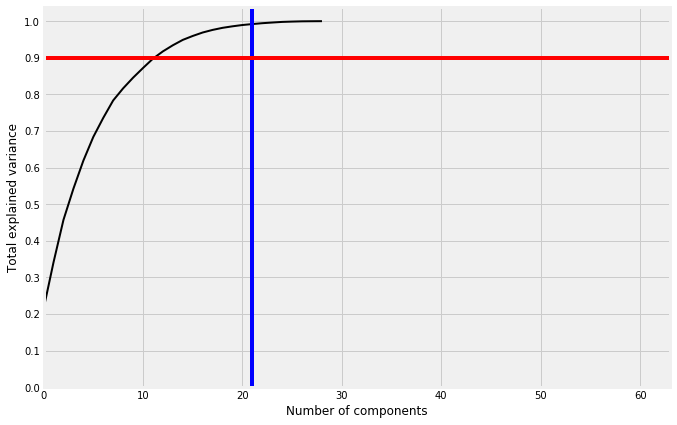

In [1731]:
pca = decomposition.PCA().fit(FeatureEngineeredDF_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

I took top 13 components based on the above graph

In [1742]:
pca = decomposition.PCA(n_components=13)
pca.fit(FeatureEngineeredDF_scaled)
X_pca = pca.transform(FeatureEngineeredDF_scaled)
X_pca_DF = pd.DataFrame(data = X_pca,columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13'])
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            FeatureEngineeredDF_scaled.columns)))
print("total explained variance",np.sum(pca.explained_variance_ratio_)*100,"%")

1 component: 21.43% of initial variance
-0.112 x nm + -0.150 x prod + -0.292 x productId + -0.348 x protocol + 0.084 x sigwid + -0.324 x company_name + -0.245 x machine_type + -0.111 x os_arch + -0.218 x os_name + -0.402 x product_name + -0.086 x product_version + -0.108 x vertical_id + -0.138 x city_name + 0.010 x country_name + -0.115 x real_region_name + 0.208 x dir + -0.004 x mod + -0.068 x sp_major_version + -0.038 x LocalIP_Length + 0.017 x RemoteIP_Length + -0.025 x isValidLocalIP + 0.488 x isValidRemoteIP + -0.002 x Diff_curr_last_vdb + 0.001 x Diff_time_curr_vdb + -0.146 x currVDB_Sin + 0.036 x currVDB_Cos + -0.041 x lastVDB_Sin + 0.034 x lastVDB_Cos + -0.000 x DectTime_Sin
2 component: 12.71% of initial variance
0.094 x nm + 0.064 x prod + -0.205 x productId + 0.161 x protocol + -0.065 x sigwid + -0.184 x company_name + -0.210 x machine_type + -0.229 x os_arch + -0.287 x os_name + -0.231 x product_name + -0.315 x product_version + -0.212 x vertical_id + 0.151 x city_name + -0

In [ ]:
df = 

In [1737]:
np.sum(pca.explained_variance_ratio_[:3])*100

45.72403842662496

### Modeling ####

In [1714]:
from sklearn.cluster import KMeans

#### K-Means || Clustering

I will initally try to see how many cluster are there initally before going on to the outlier dectection

Using the principle components for analysis

looking for optimal K

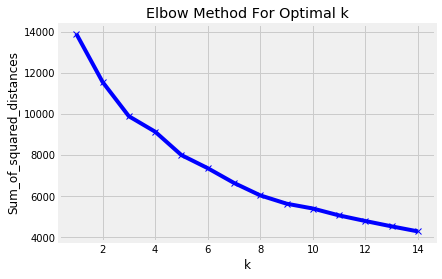

In [1746]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_pca_DF)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

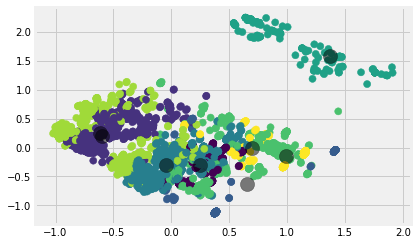

In [1747]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X_pca_DF)
y_kmeans = kmeans.predict(X_pca_DF)
plt.scatter(X_pca_DF.iloc[:, 0], X_pca_DF.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

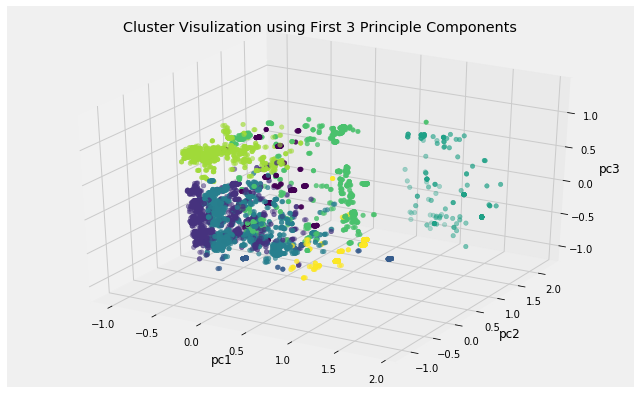

In [1748]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
x =X_pca_DF['pc1']
y =X_pca_DF['pc2']
z =X_pca_DF['pc3']
ax.scatter(x, y, z,c=y_kmeans, marker='o')
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.title('Cluster Visulization using First 3 Principle Components')
plt.show()

#### Research on K-Means ####

In [ ]:
Now, trying to isolate the anomalies based on the clustering method as a part of Brainstorming Exercise 

#### Outlier Detection ####

##### Isolation Forest 

In [1769]:
from sklearn.ensemble import IsolationForest

In [1772]:
IFDF = FeatureEngineeredDF_scaled.copy()
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12),max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(IFDF)
IF_pred = clf.predict(IFDF)
IFDF['IF_pred']=IF_pred
IFDF['isOL_IF']=np.where(IFDF['IF_pred']==1, 0, 1)
print("Outliers stated by IsolationForest(Default): ",IFDF['isOL_IF'].sum())

Outliers stated by IsolationForest(Default):  881


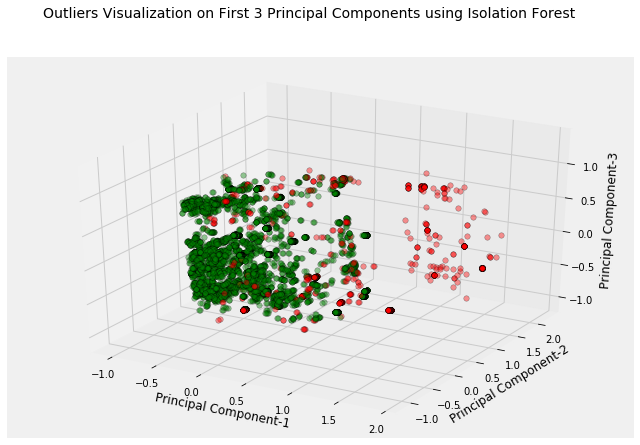

In [1773]:
fig = plt.figure(figsize=(10,7))
t = fig.suptitle('Outliers Visualization on First 3 Principal Components using Isolation Forest', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(X_pca_DF['pc1'])
ys = list(X_pca_DF['pc2'])
zs = list(X_pca_DF['pc3'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 1 else 'green' for wt in list(IFDF['isOL_IF'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

xl = ax.set_xlabel('Principal Component-1')
yl = ax.set_ylabel('Principal Component-2')
zl = ax.set_zlabel('Principal Component-3')

### Model Explaination ###

Before jumping on the model explaination let's extrate the features which had +ve weights while undergoing PCA Decomposition. Then we can view the how the values are different for outliers and non-outliers

based on the analysis there were 5 columns which had an overall positive weight for 13 components

Now, I will take two columns to show the difference in pattern for the outlier detected by Isolation Forest.

In [1815]:
ModelExpDF = IFDF[['Diff_curr_last_vdb','isOL_IF']].copy()

In [1817]:
ModelExpDF['city_name'] = processedData.city_name.copy()

In [1818]:
ModelExpDF.head()

,Diff_curr_last_vdb,city_name,isOL_IF
0,0.50134785,city141,1
1,0.50134704,city170,0
2,0.50134785,city141,1
3,0.50134704,city170,0
4,0.50176106,-9999,1


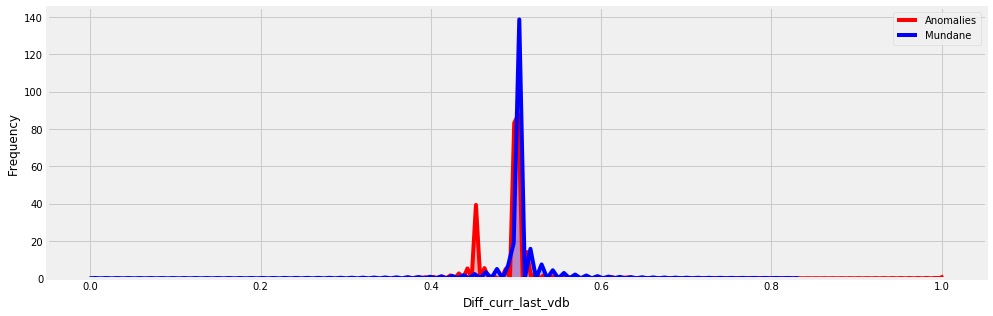

In [1821]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(ModelExpDF["Diff_curr_last_vdb"][(ModelExpDF["isOL_IF"] == 1) & (ModelExpDF["Diff_curr_last_vdb"].notnull())], color="Red", shade = True)
g = sns.kdeplot(ModelExpDF["Diff_curr_last_vdb"][(ModelExpDF["isOL_IF"] == 0) & (ModelExpDF["Diff_curr_last_vdb"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Diff_curr_last_vdb")
g.set_ylabel("Frequency")
g = g.legend(["Anomalies","Mundane"])

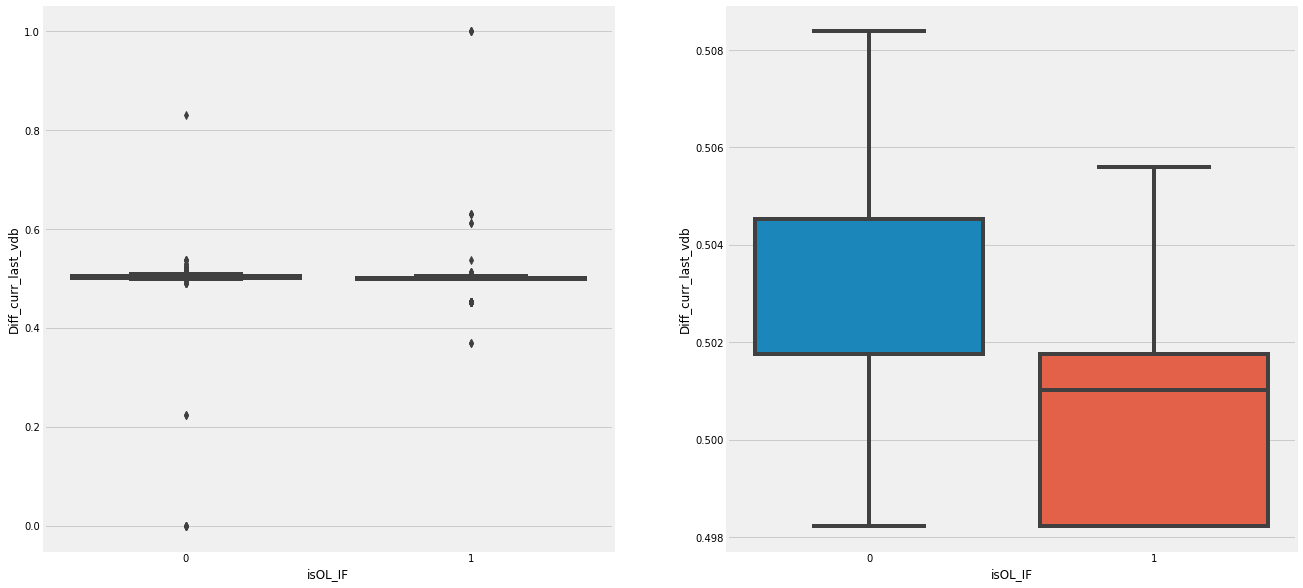

In [1822]:
fig,axarr = plt.subplots(1,2,figsize=(20,10))

sns.factorplot(y='Diff_curr_last_vdb',x='isOL_IF',data=ModelExpDF,kind='box',size=15,aspect=.4,showfliers=True,ax=axarr[0])
sns.factorplot(y='Diff_curr_last_vdb',x='isOL_IF',data=ModelExpDF,kind='box',size=15,aspect=.4,showfliers=False,ax=axarr[1])
plt.close(2)
plt.close(3)

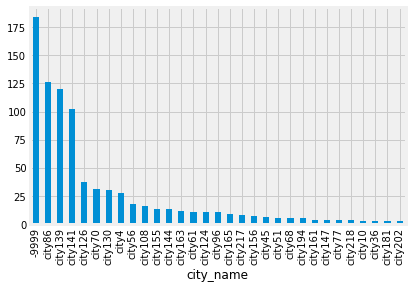

In [1829]:
pd.crosstab(ModelExpDF.city_name,ModelExpDF.isOL_IF).sort_values(1, ascending=False)[1].compress(lambda x : x > 2).plot(kind='bar')

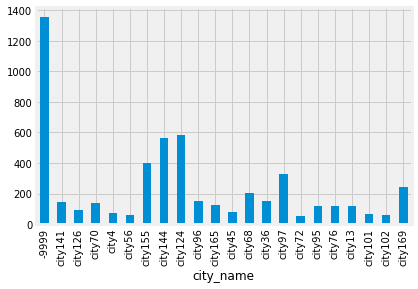

In [1831]:
pd.crosstab(ModelExpDF.city_name,ModelExpDF.isOL_IF).sort_values(1, ascending=False)[0].compress(lambda x : x > 50).plot(kind='bar')